### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

# **1. Dataset import**


In [ ]:
df = pd.read_csv("Hotel_Reservations.csv", sep = ',')

In [3]:
# alternative dataset import
url = 'https://raw.githubusercontent.com/nthang2/Reserver-prediction/main/Hotel_Reservations.csv'
df = pd.read_csv(url)

Here we can see that we have categorical and continuous variables, we can also see that we have this column Booking ID that will probably not be used, we can also see that we don't have null values.






Here the explanation about the variables:
    - Booking_ID: unique identifier of each booking
    -no_of_adults: Number of adults
    -no_of_children: Number of Children
    -no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    -no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    -type_of_meal_plan: Type of meal plan booked by the customer:
    -required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
    -room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    -lead_time: Number of days between the date of booking and the arrival date
    -arrival_year: Year of arrival date
    -arrival_month: Month of arrival date
    -arrival_date: Date of the month
    -market_segment_type: Market segment designation.
    -repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
    -no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
    -no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
    -avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    -no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    -booking_status: Flag indicating if the booking was canceled or not.

In [4]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 ##   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date                          36275 non-null  int64  
 12  market_segment_type                   36275 non-null  object
 13  repeated_guest                        36275 non-null  int64  
 14  no_of_previous_cancellations          36275 non-null  int64  
 15  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 16  avg_price_per_room                    36275 non-null  float64
 17  no_of_special_requests                36275 non-null  int64  
 18  booking_status                        36275 non-null  object
dtypes: float64(1), int64(13), object(5)
memory usage: 5.3+ MB

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
(df.isnull().sum()/len(df))

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

# **2. Data Analysis**


Verifying the correlation between our variables:

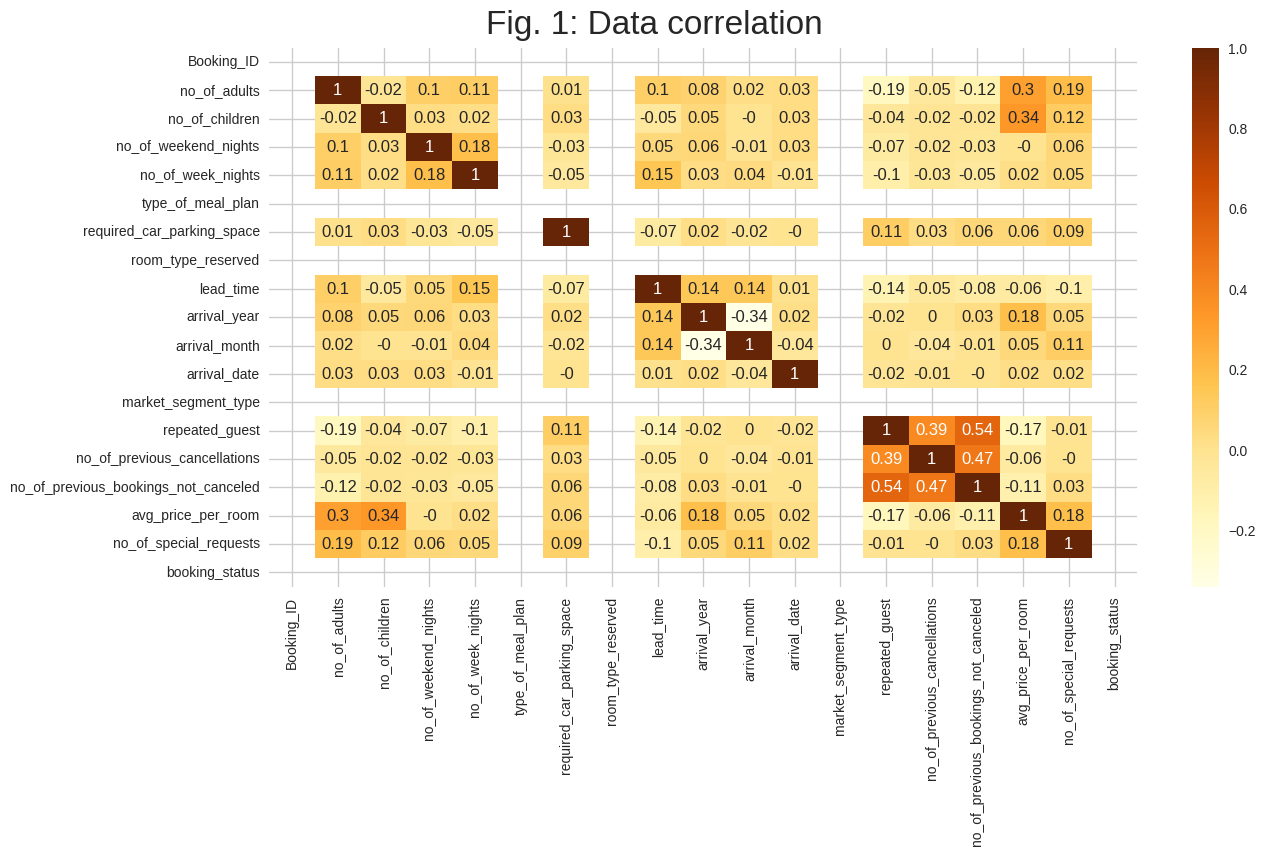

In [33]:
correlation = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

txt="Fig. 1: Data correlation"
plt.figtext(0.4, 0.9, txt, wrap=True, ha='center', fontsize=24);

 We can see that we don't have strong correlation between the variables.


## Categorical Variables

Looking at our categorical variables, we can see that most reservations are made for rooms with two adults, without children, generally reservations are short-term, not many cases are long-term, most reservations select meal_plan_1, no need a car space, the most booked room types are types 1 and 4 and most of our data is 2018 bookings.


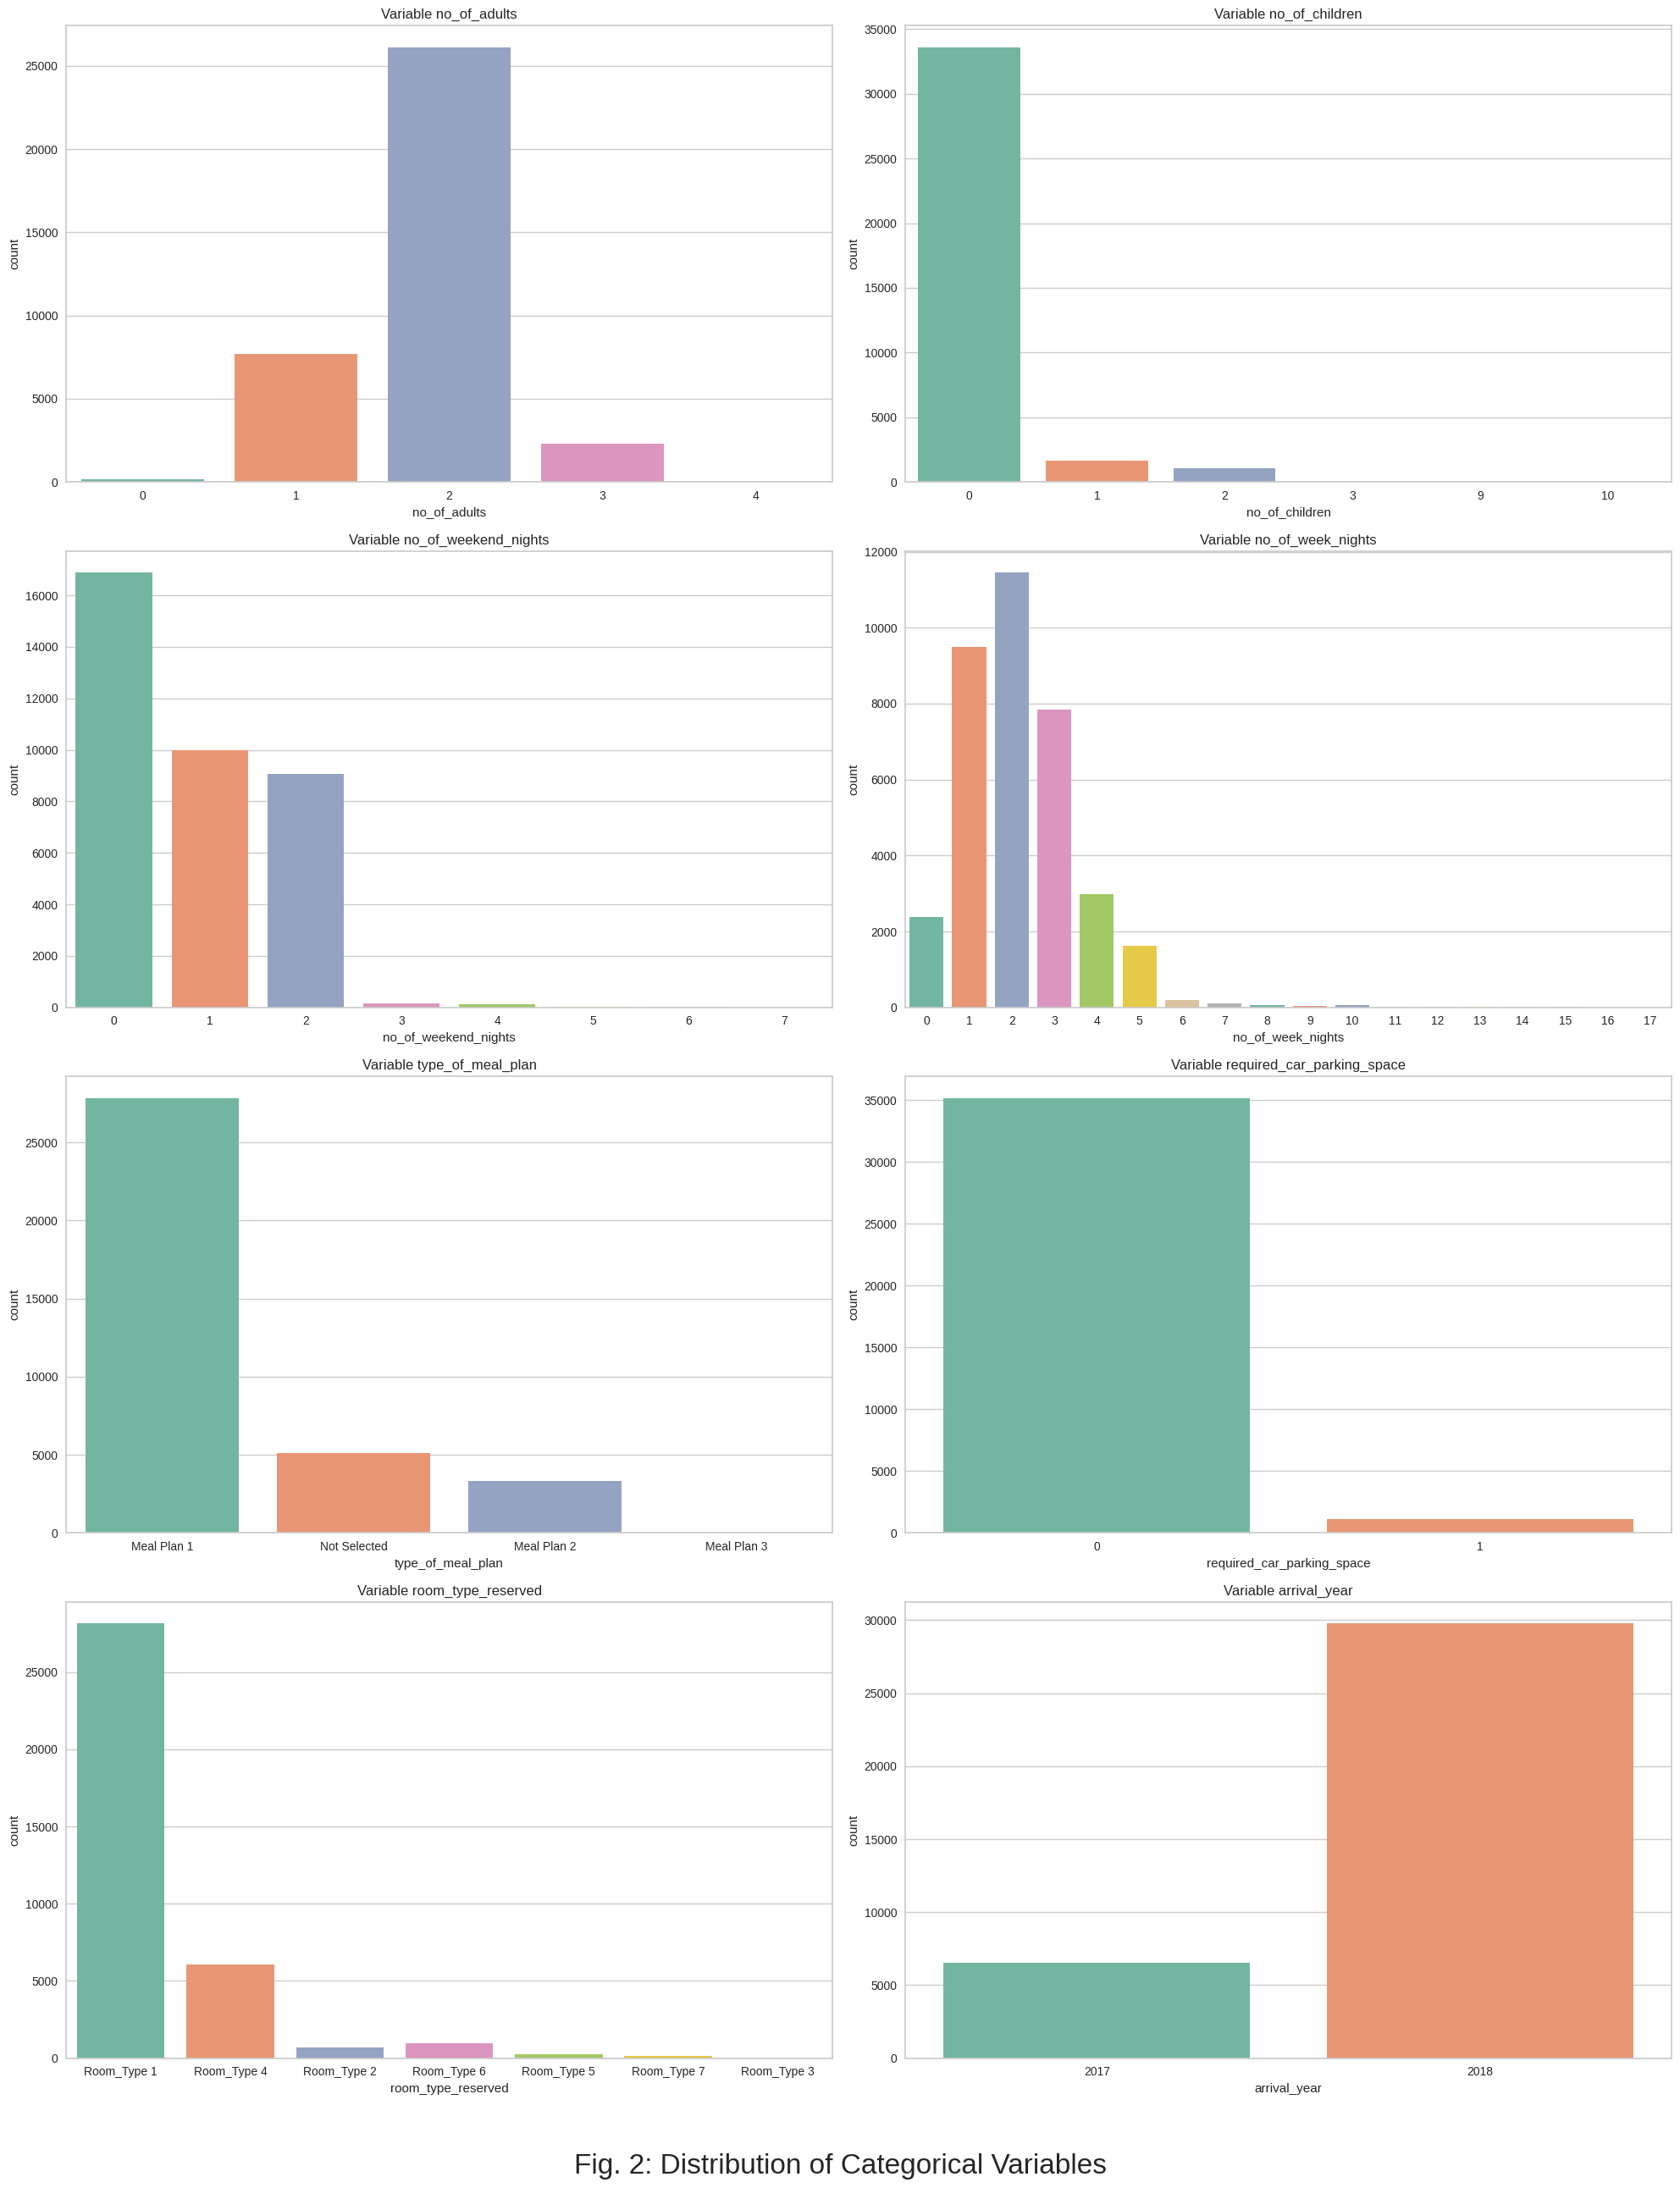

In [48]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

plt.figtext(0.5, -0.03, 'Fig. 2: Distribution of Categorical Variables', fontsize=24, ha='center')

plt.tight_layout()

When we look at the bookings by month, we can see that there is an increase, from January to October the number of bookings gradually grows and it drops again in the months of November and December, most bookings are made online, most of the guests are guests who they have never been to the hotel and are usually guests who have never canceled, the greater the number of special requests, the less data we have. When we look at our target variable, we can see that we have approximately 65% ​​of reservations that have not been cancelled.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

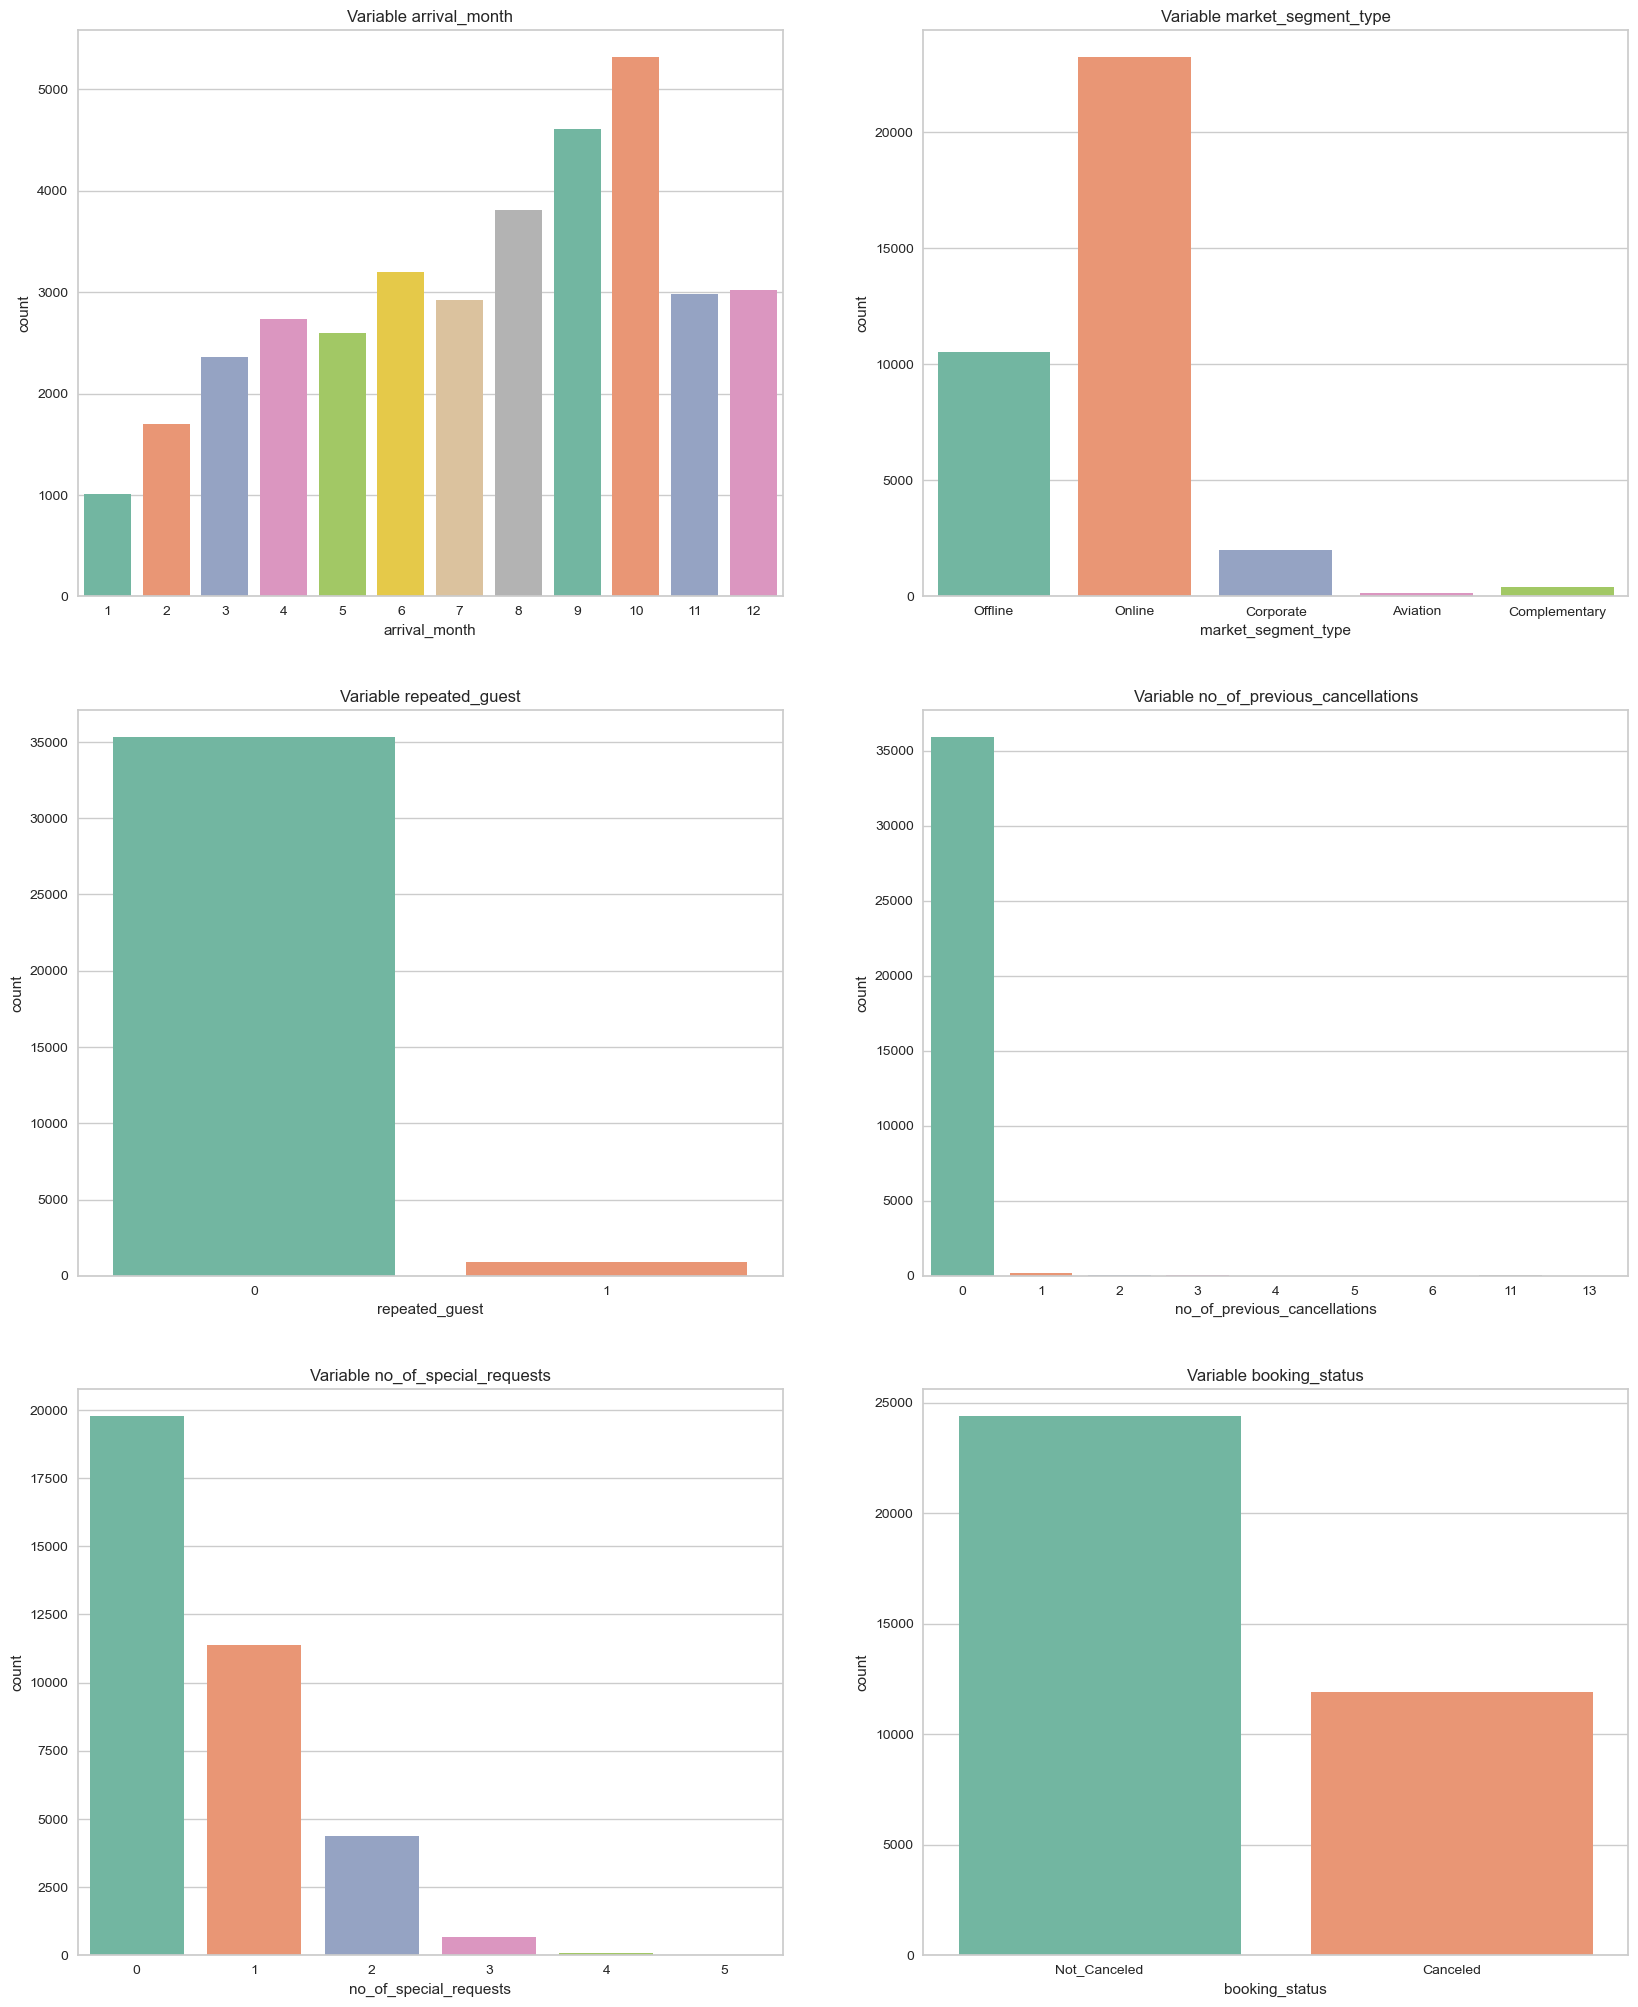

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)


## Continous Variables


Looking at our continuous variables we can see that generally reservations are made without taking too long, the longer it takes, the smaller the number of reservations, we can see that the top of our data is usually at 100 euros the average price of the room and that the guests usually never canceled a booking before.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

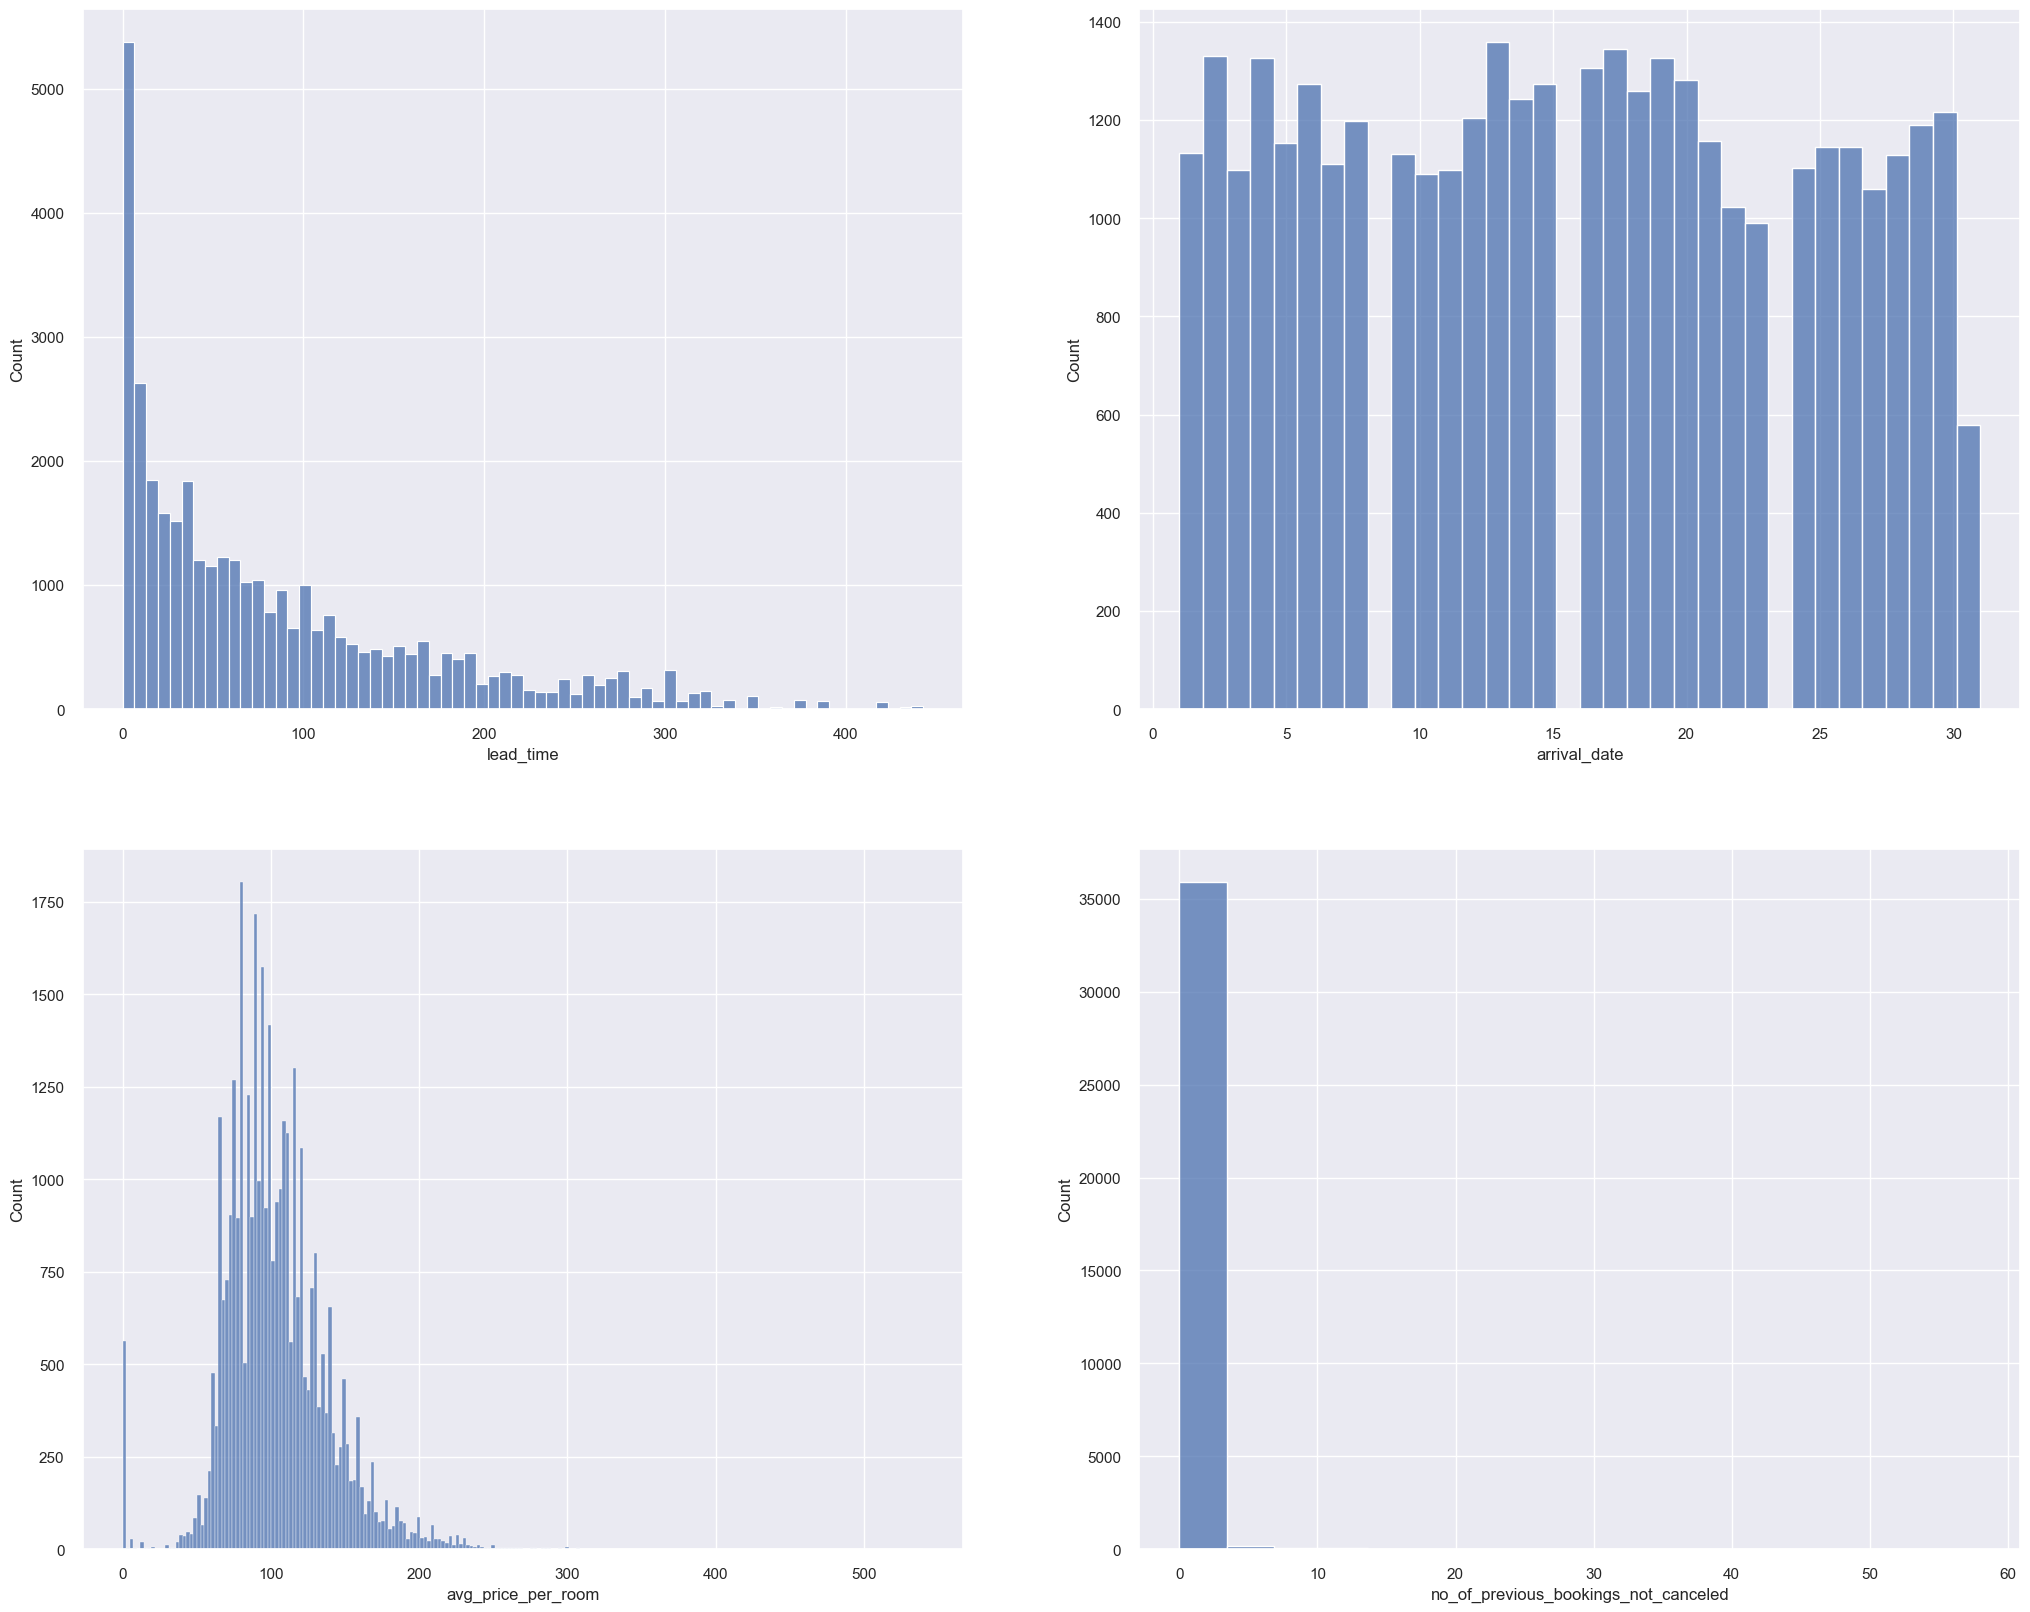

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)


When checking our Boxplots, we can see that we have some outliers but for now we are not going to deal with them.


<Axes: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

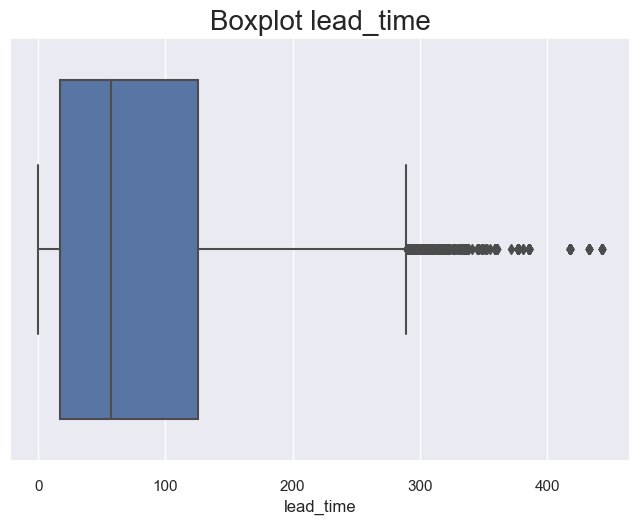

In [ ]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

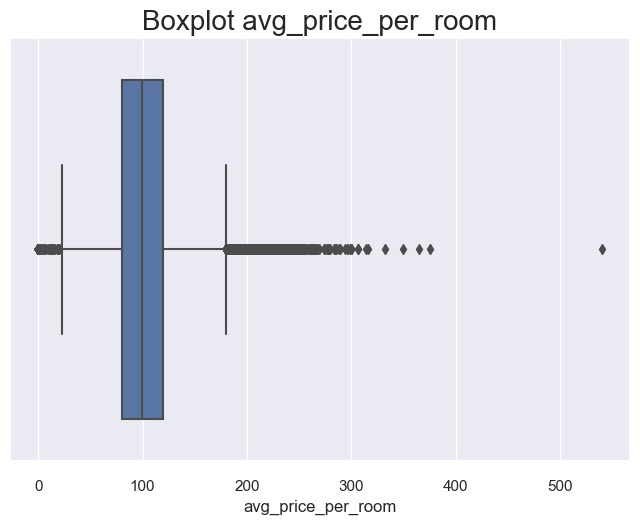

In [ ]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

## Bivariate Analysis


Looking at our target variable, we can have some insights, generally guests who request a parking space, guests who have stayed previously are guests who generally do not cancel the reservation, guests who request special requests are guests less likely to cancel, the more requests, the less probably, the biggest distortion we see here is the Lead_Time variable, the longer the person takes to book the room, the more likely they are to cancel, which makes a lot of sense, another interesting view is that in the final 3 months of the year we usually have less cancellations, despite being a slight incline, we can see that more expensive rooms may also experience more cancellations.


<Axes: xlabel='booking_status', ylabel='count'>

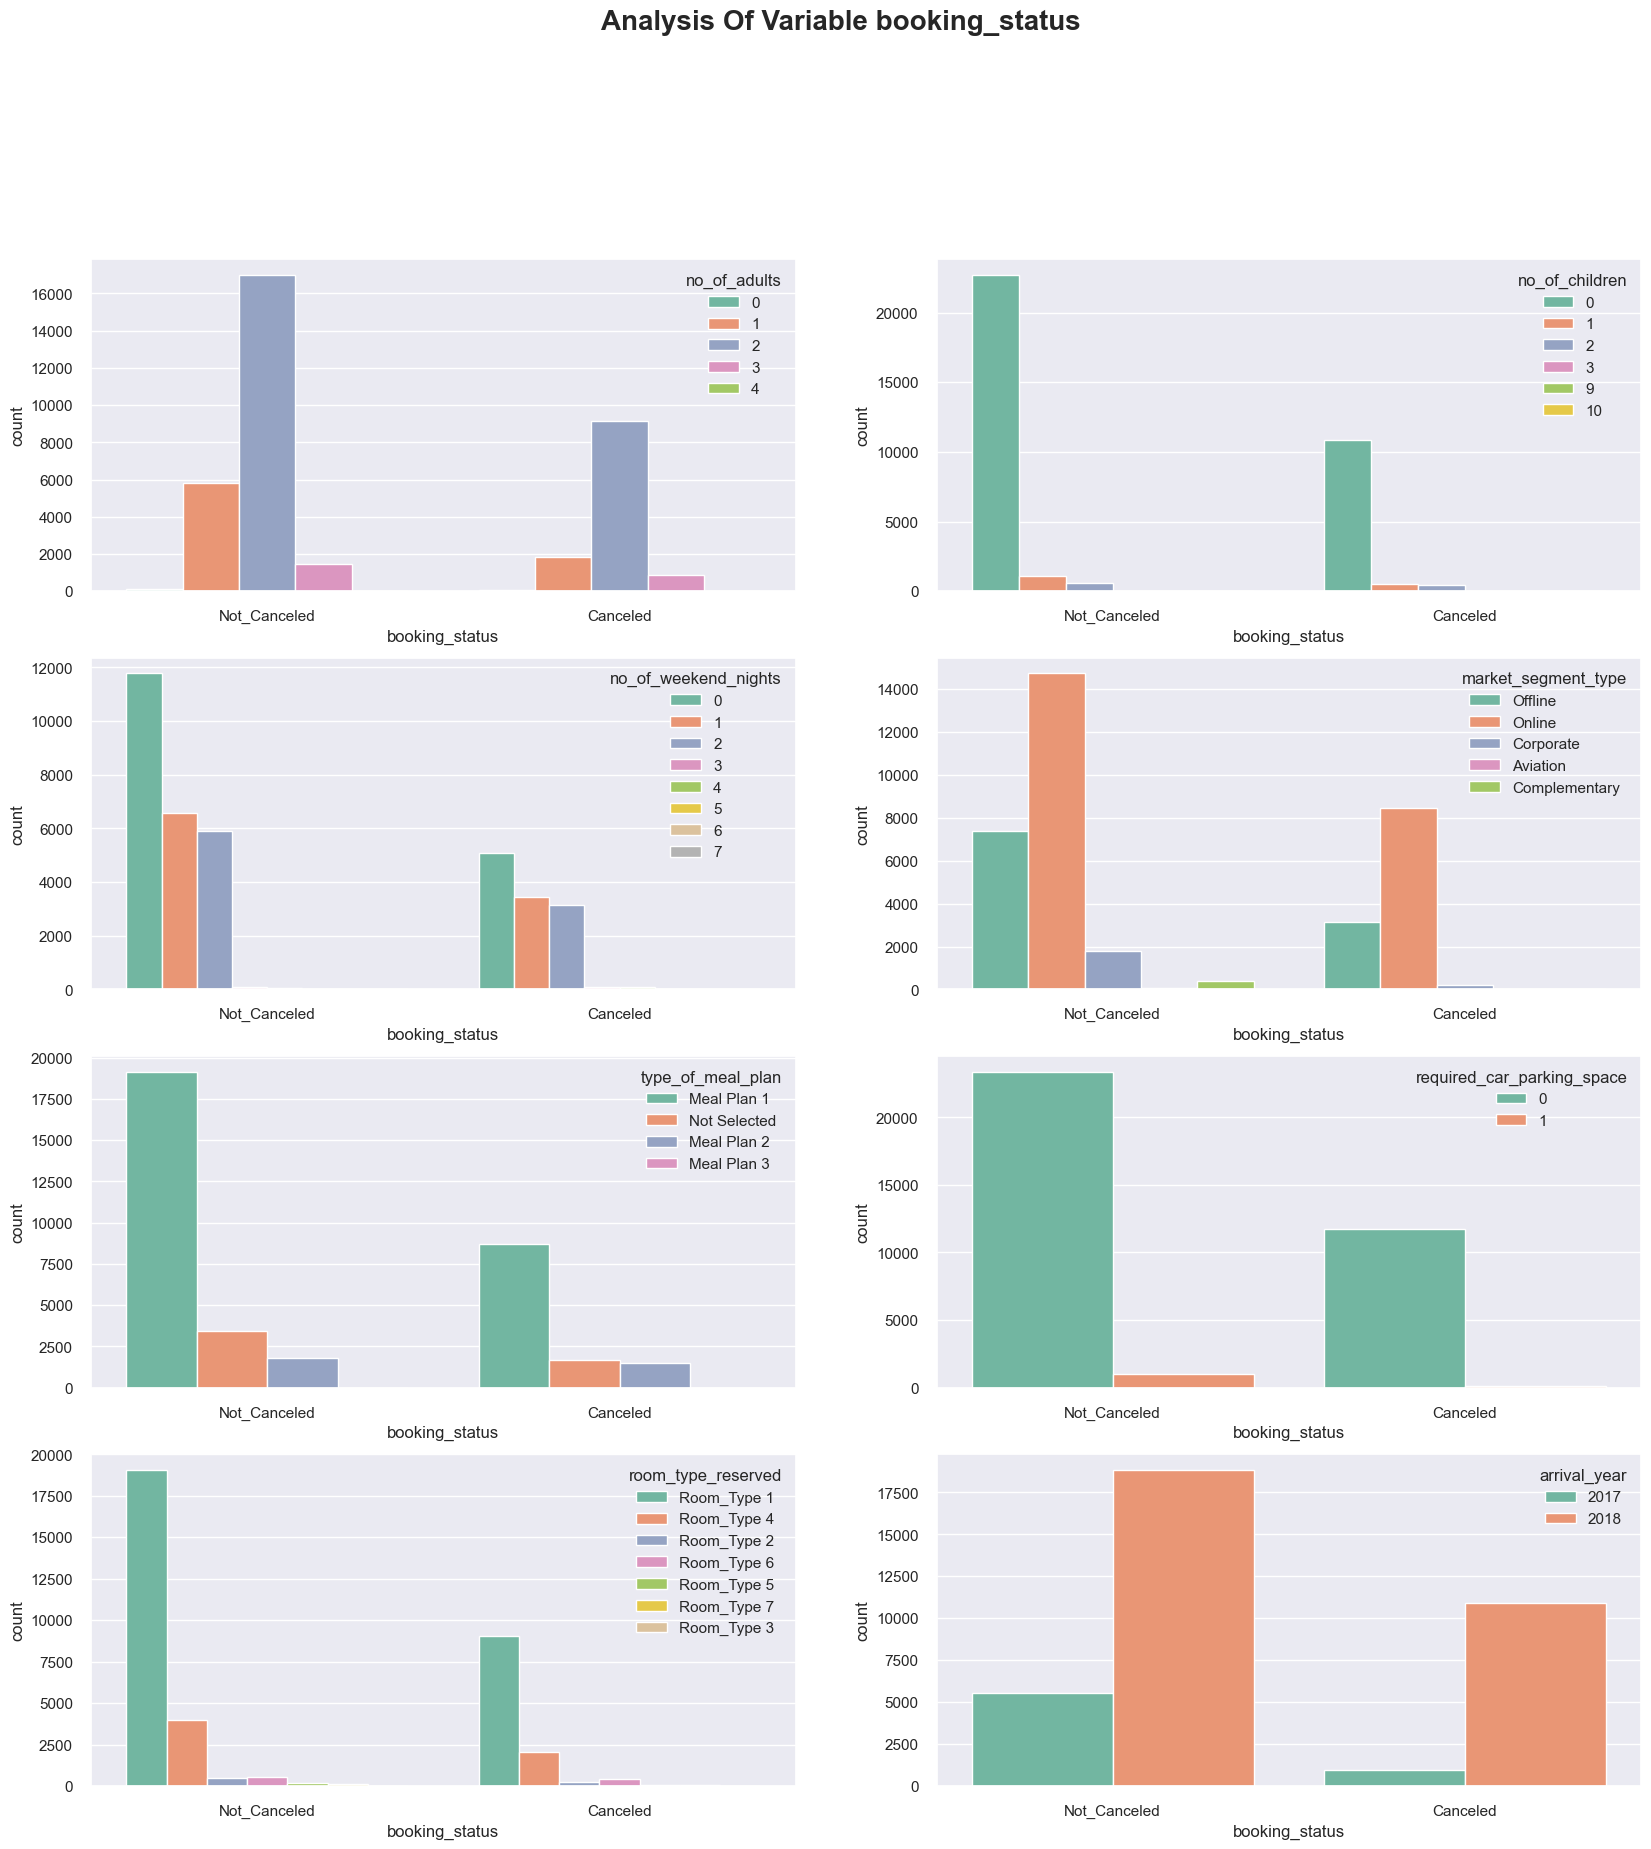

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

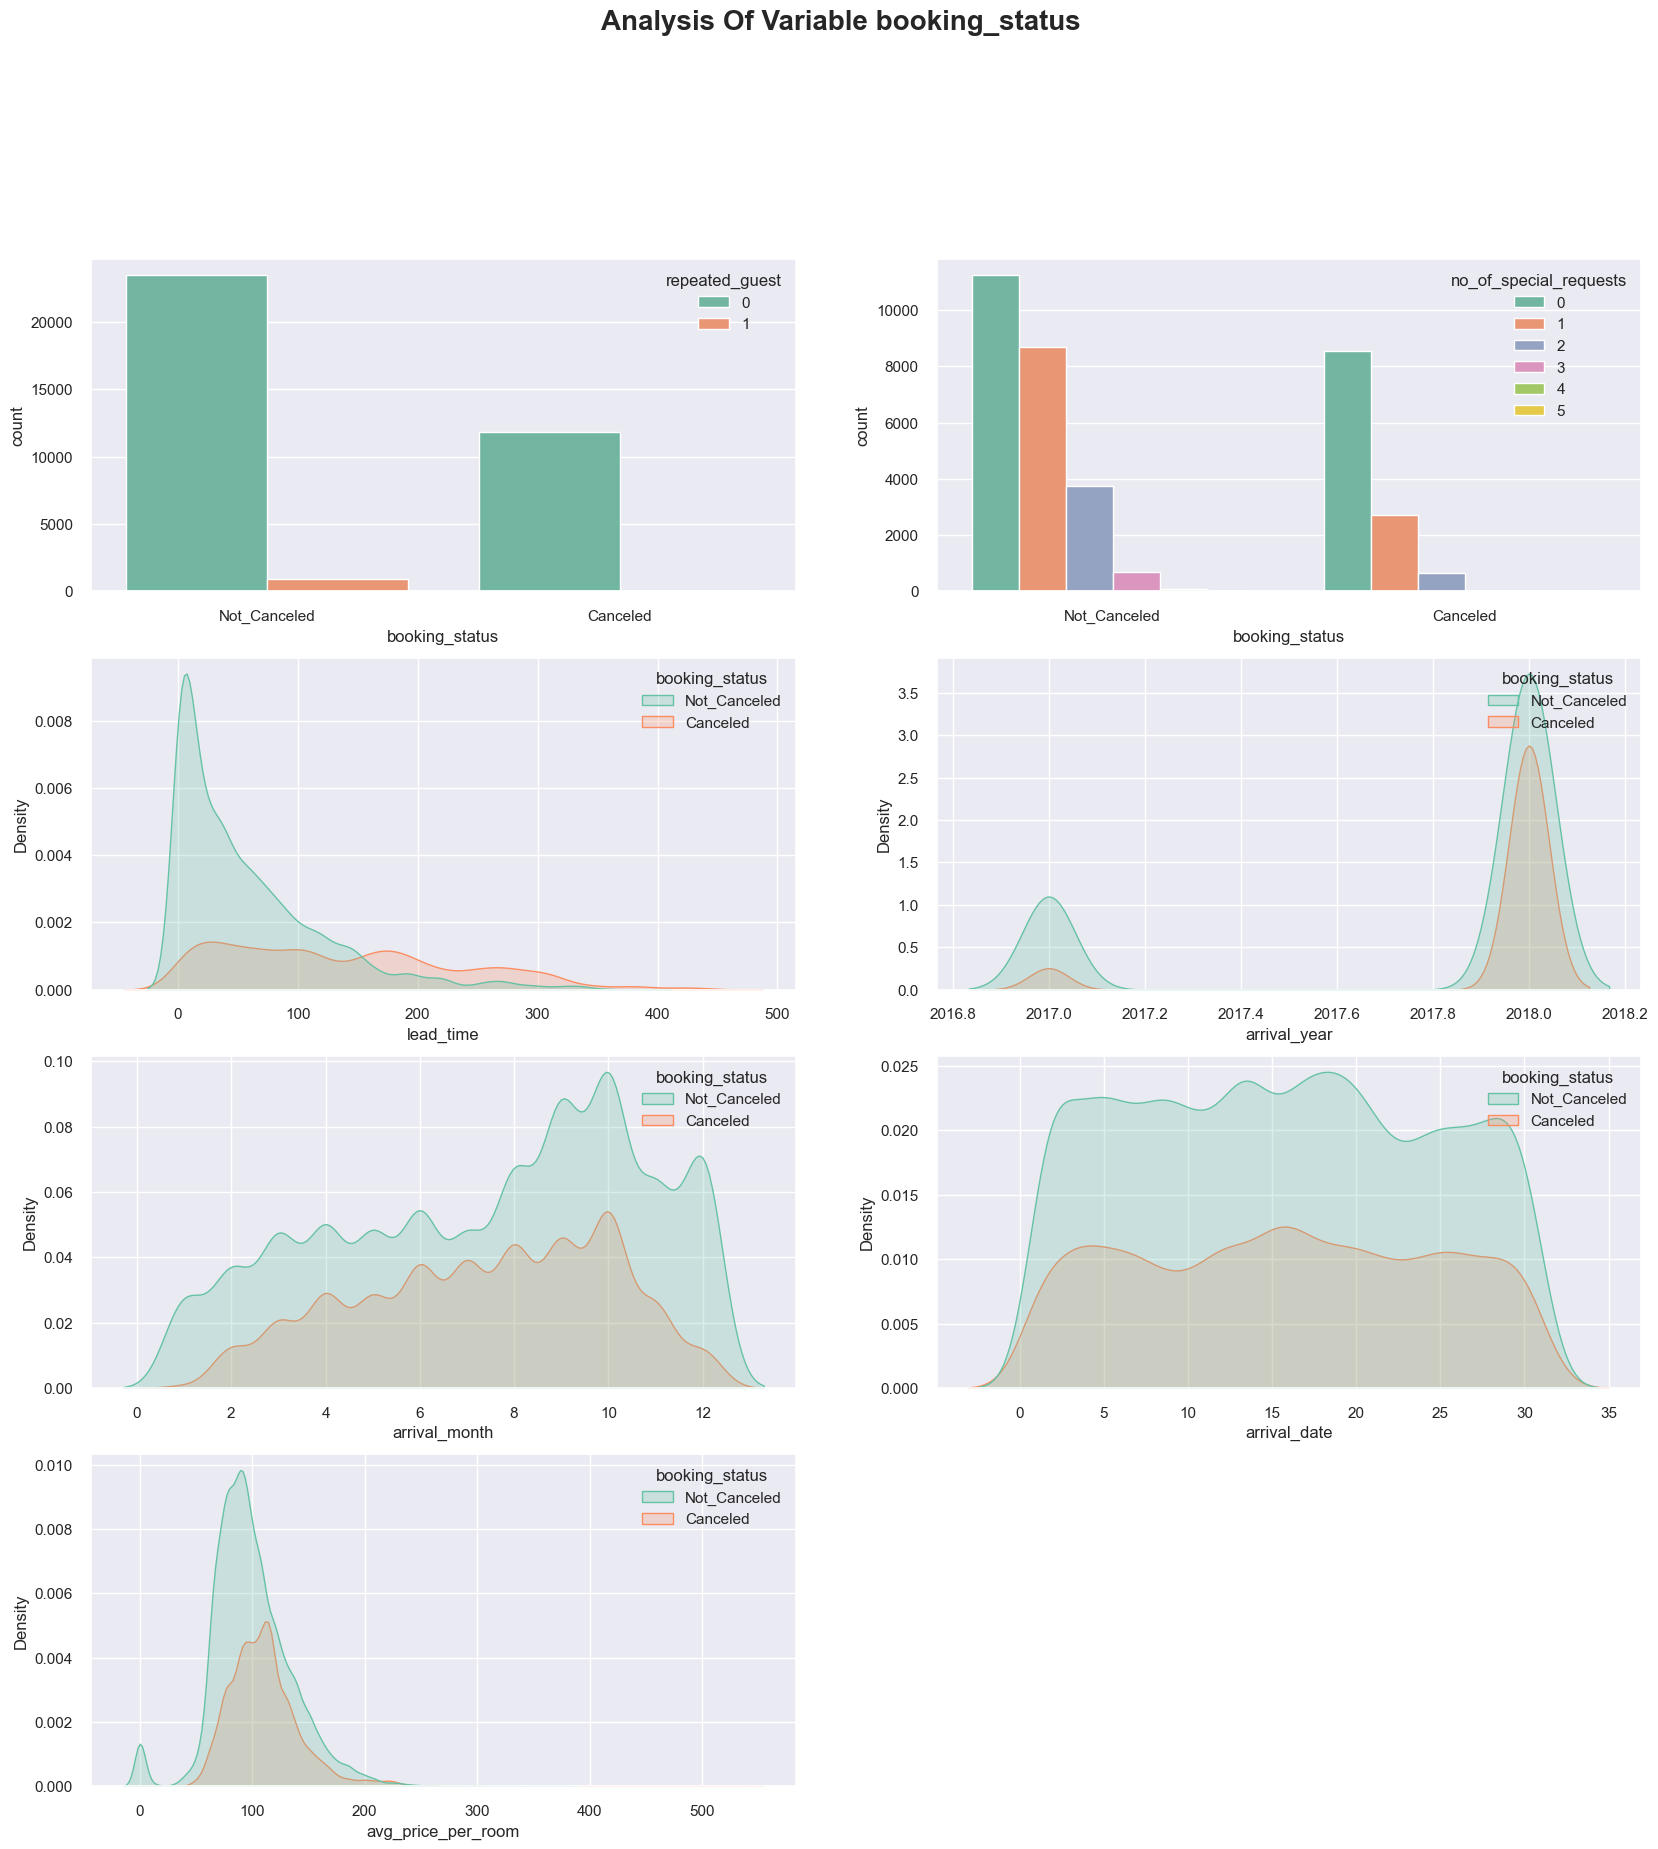

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', fill=True, data=df)


Now, as we saw earlier, the Lead_Time variable was the one that had the most differentiation between canceled and non-cancelled, so let's take a deeper look at it, we can see that generally those who request a car parking space have a shorter lead time, we see the same something with guests who have already stayed at the hotel, when we look at the other variables we have some that call our attention, the variable no_weekend_nights usually those who stay 3 or 4 nights have a longer lead_time, when we look at the segment too, guests on "special" reasons usually do not have a high lead time, when we look at meal_plan, guests who use meal_plan2 usually have a very high lead time, when we look at the type of room we see that we have some rooms that are selected faster than others and when we look at the special requests, although it takes, the more requests, the lead time goes down.

<Axes: xlabel='lead_time', ylabel='Density'>

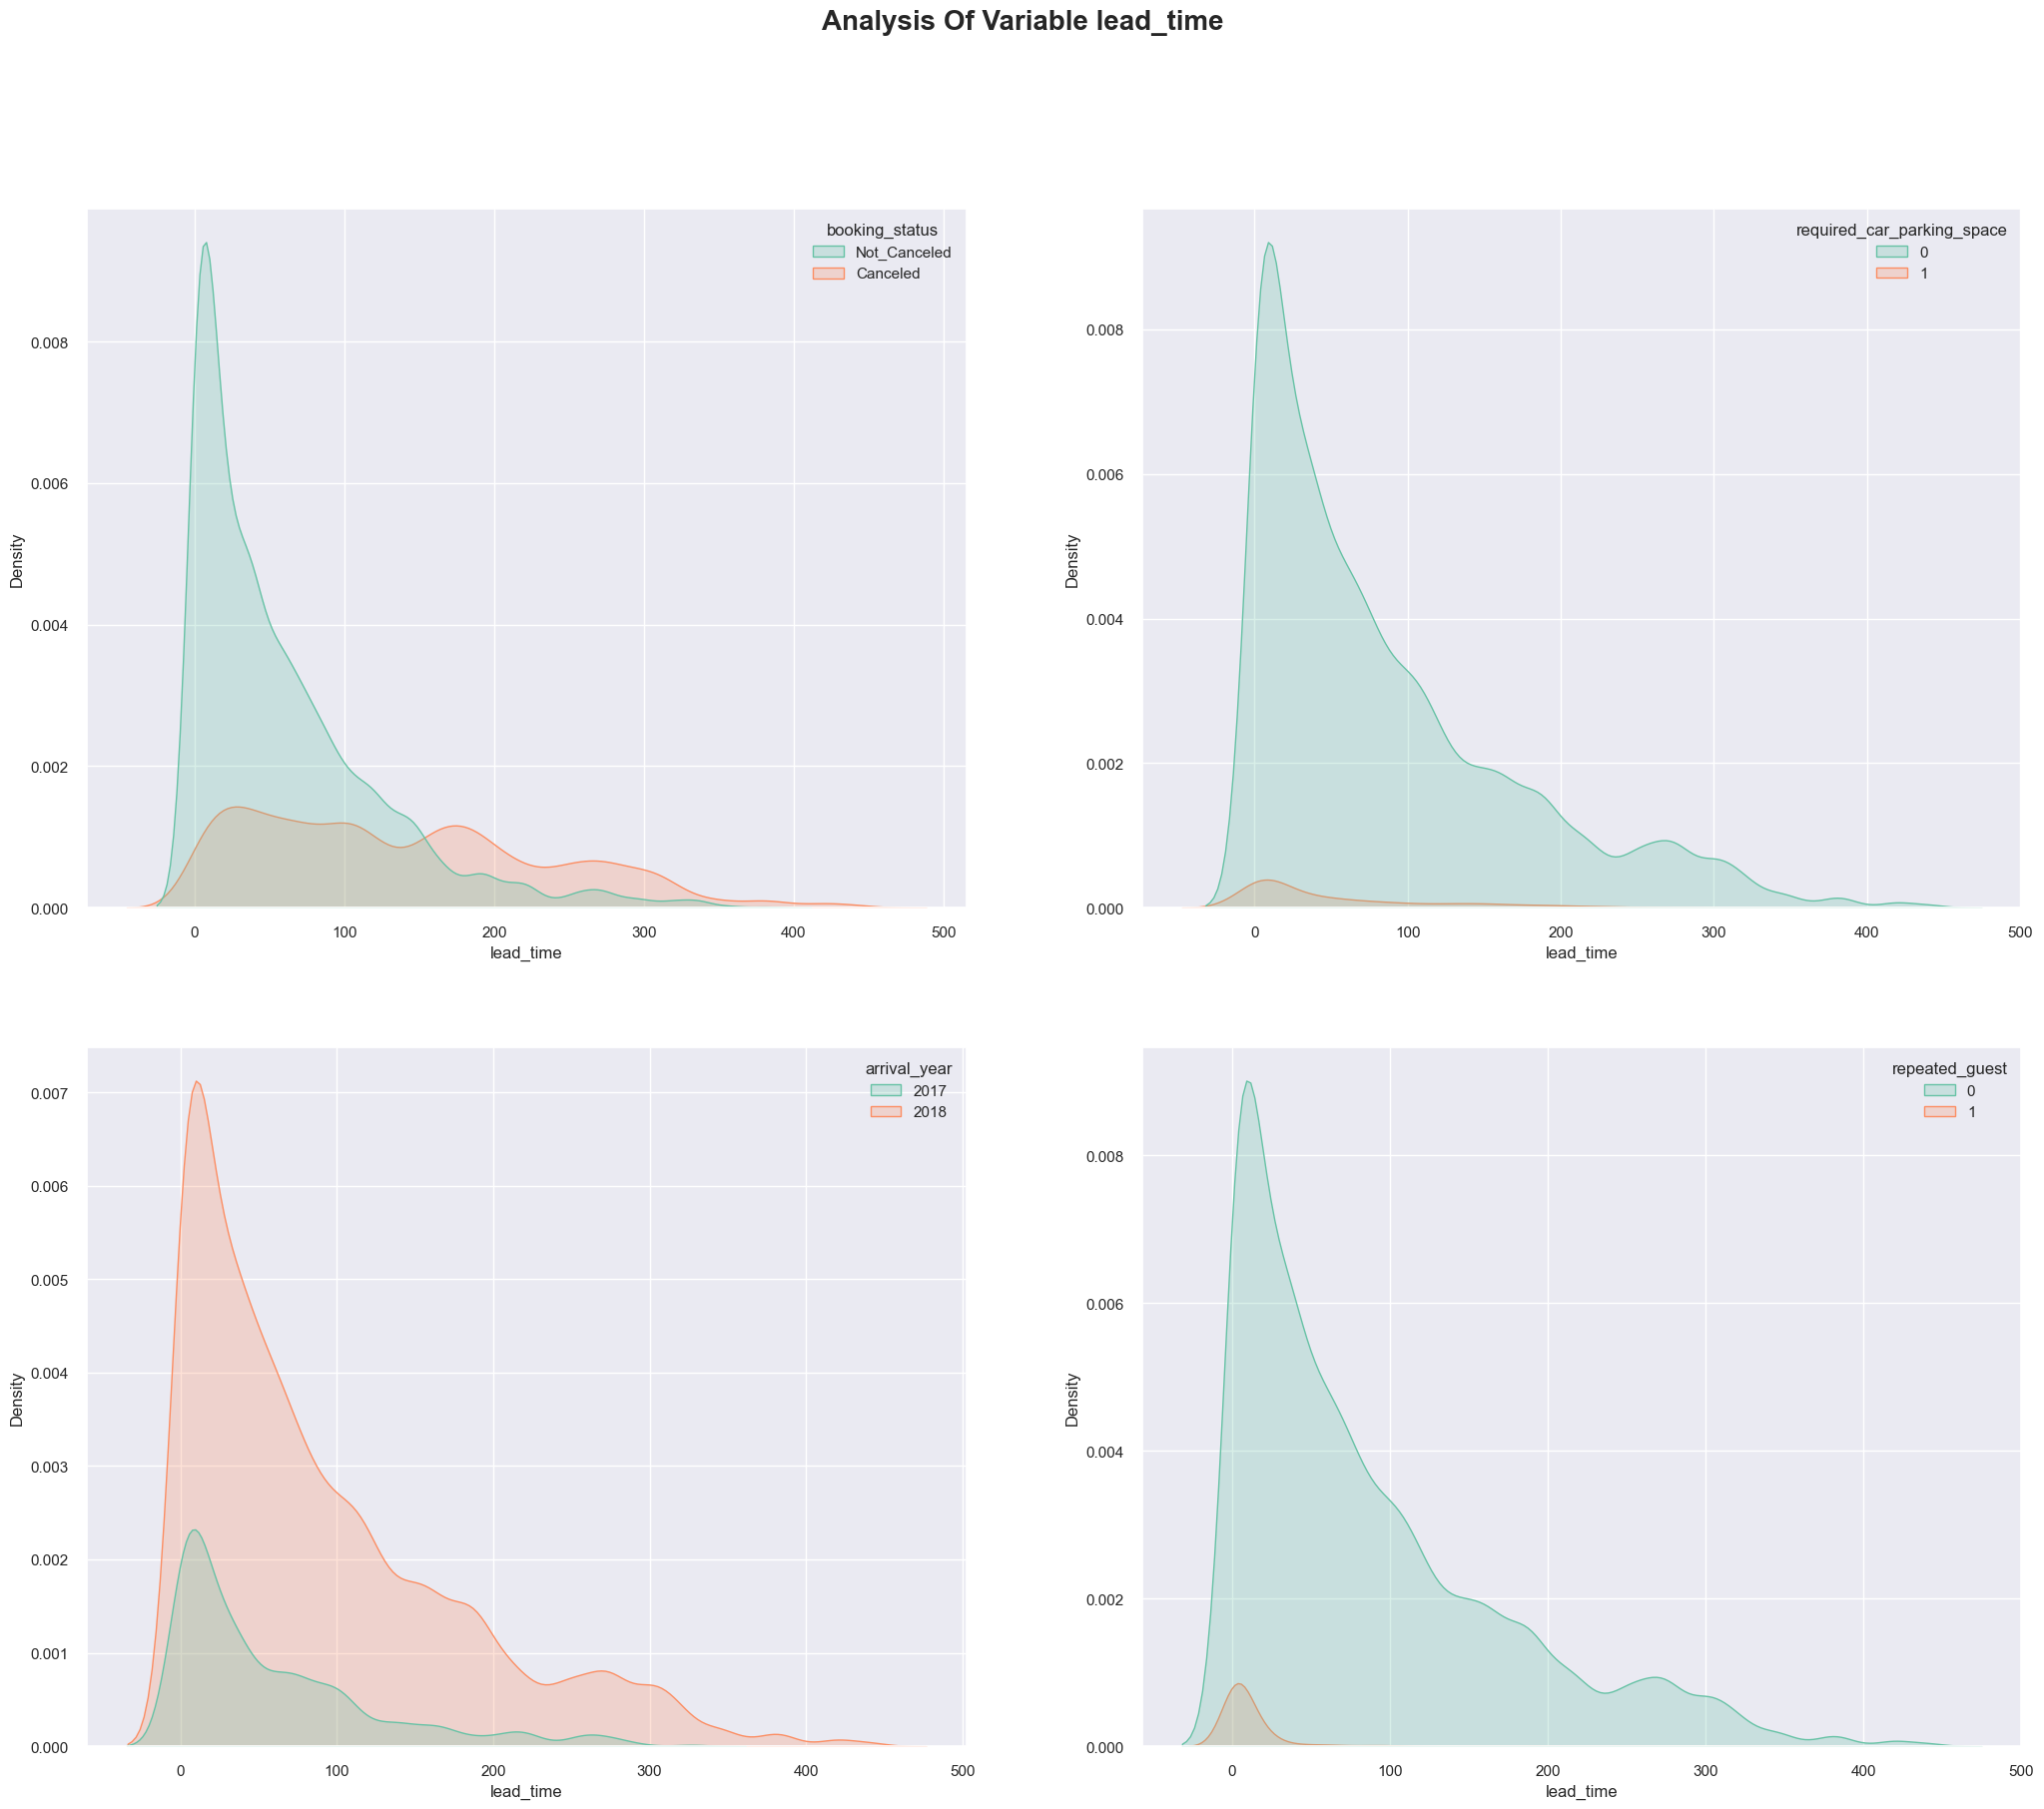

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', fill=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', fill=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', fill=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', fill=True, data=df)

<Axes: xlabel='no_of_special_requests', ylabel='lead_time'>

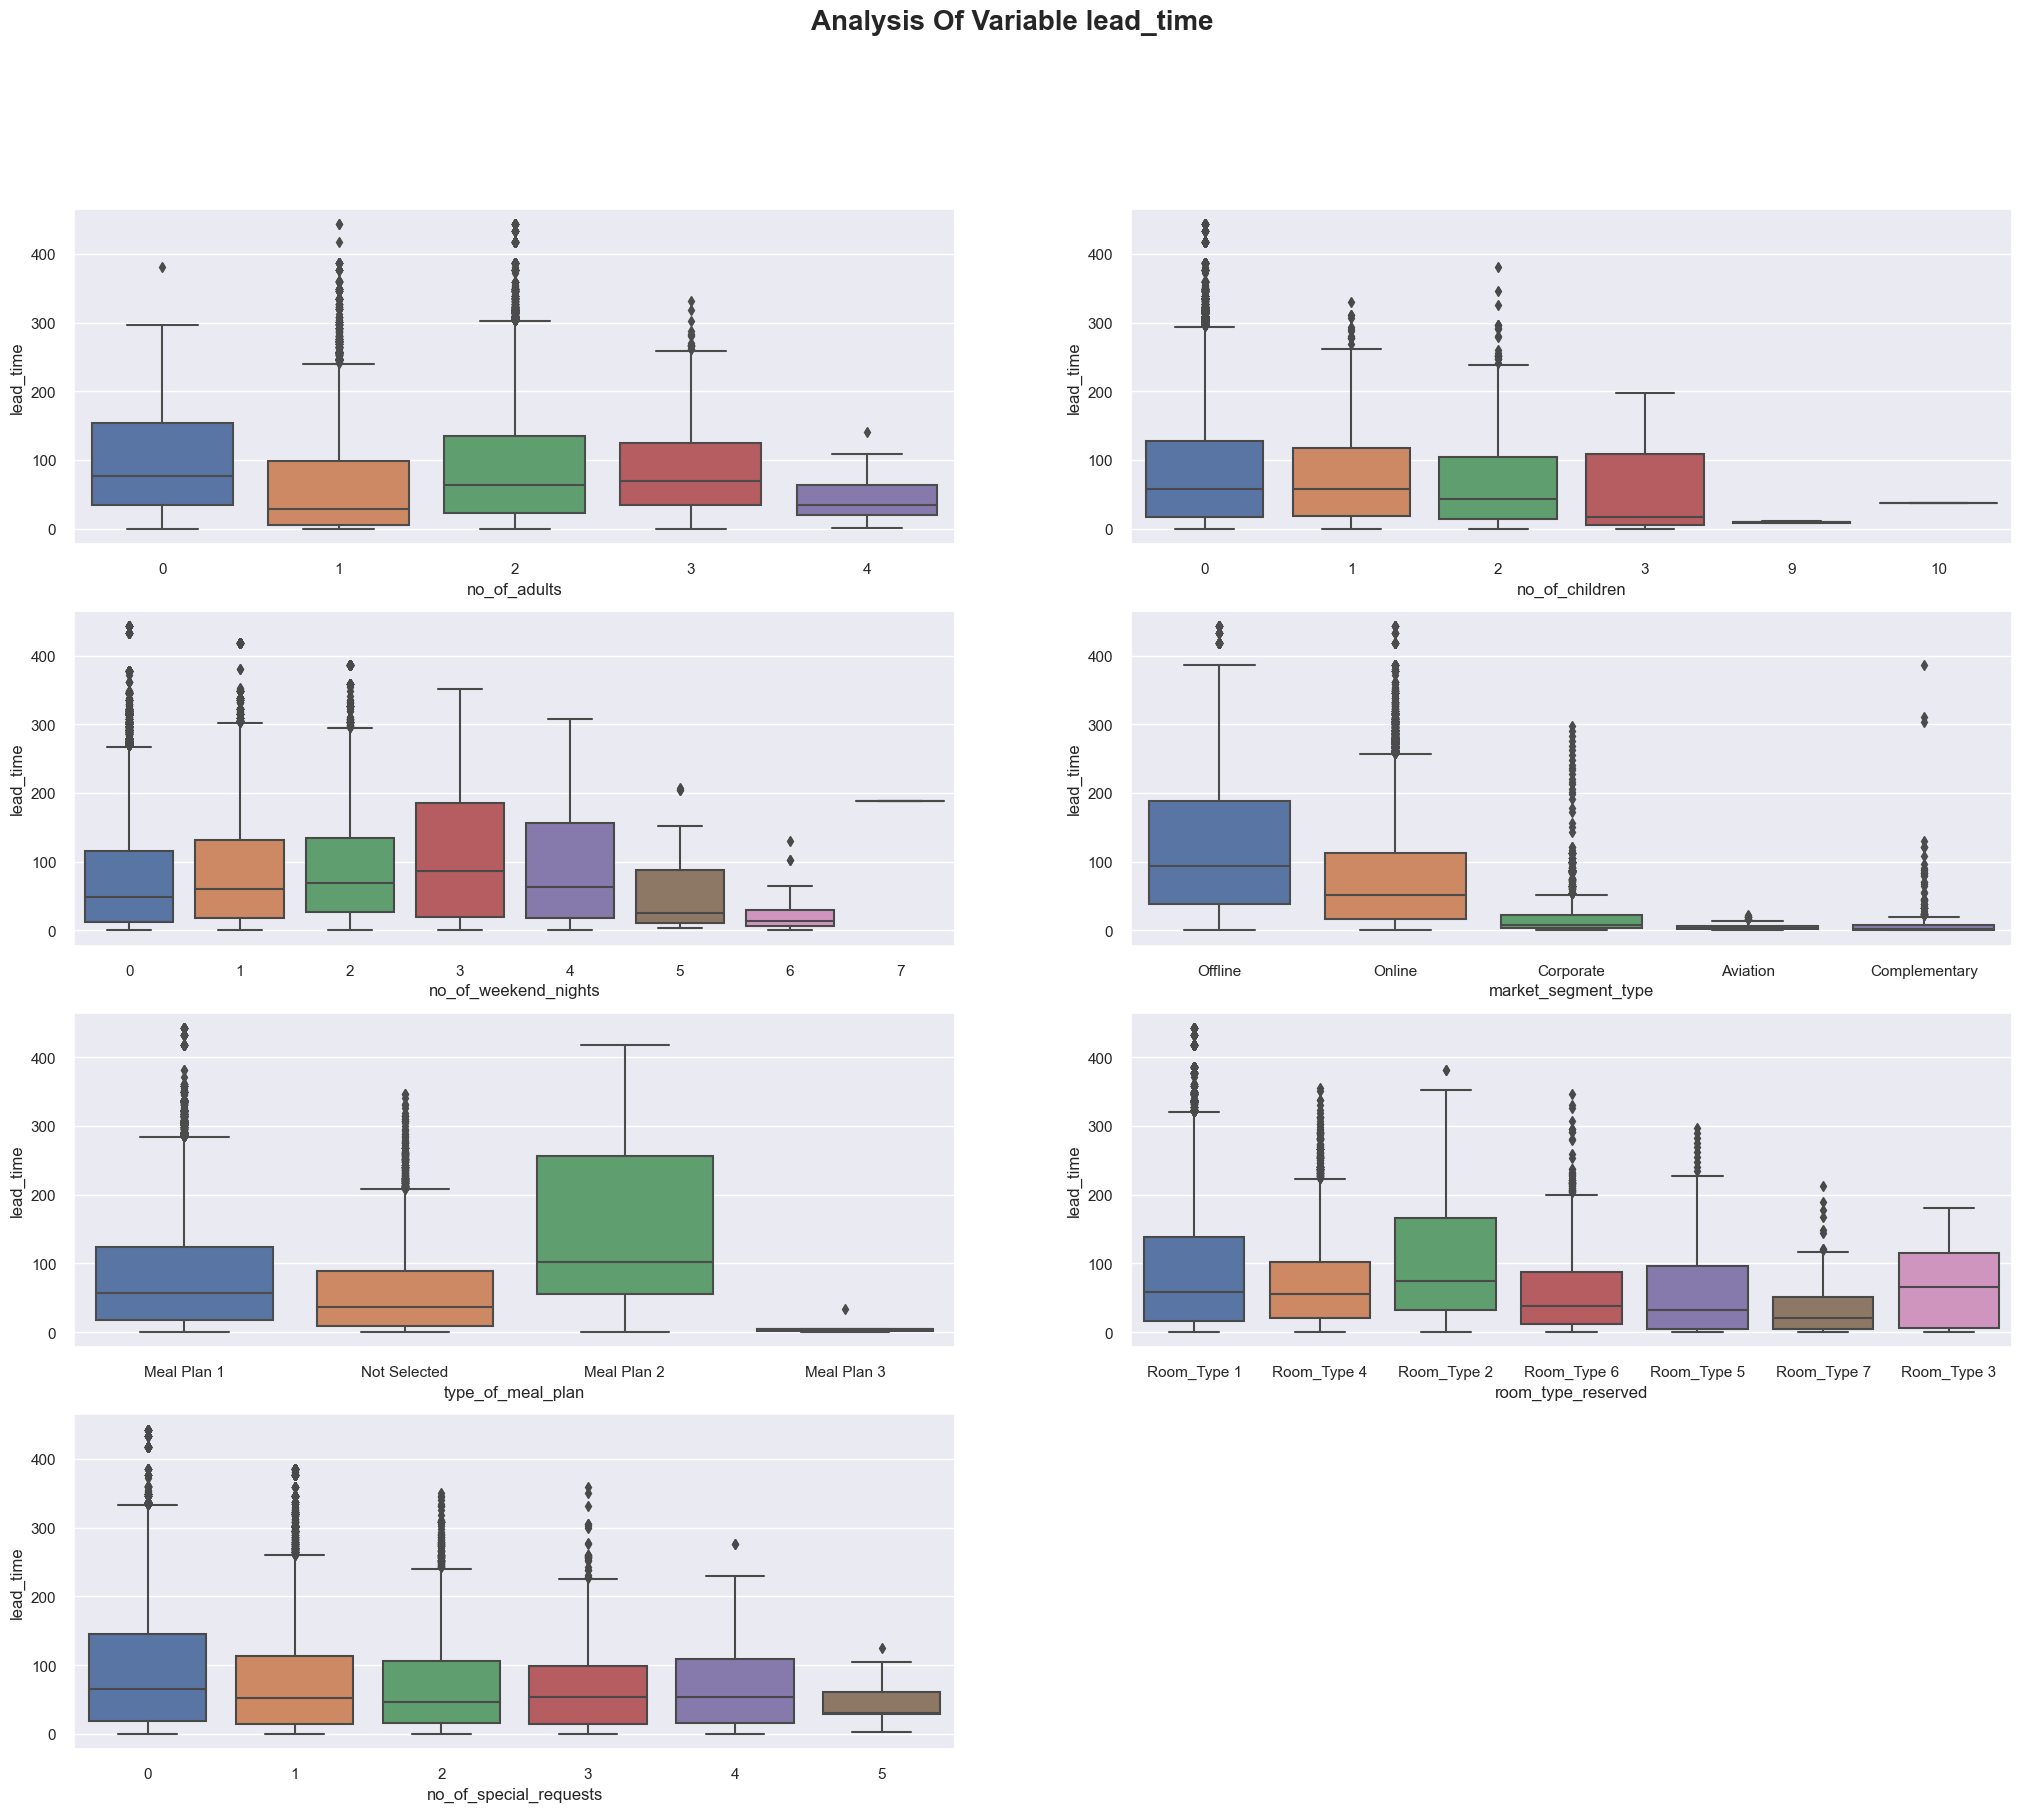

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

We can see that at the beginning of the year and at the end of the year are the months in which reservations are made more quickly, when we look at guests who have already canceled and those who have not stayed we can see the same pattern, those who already know the hotel do not have a high lead time.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

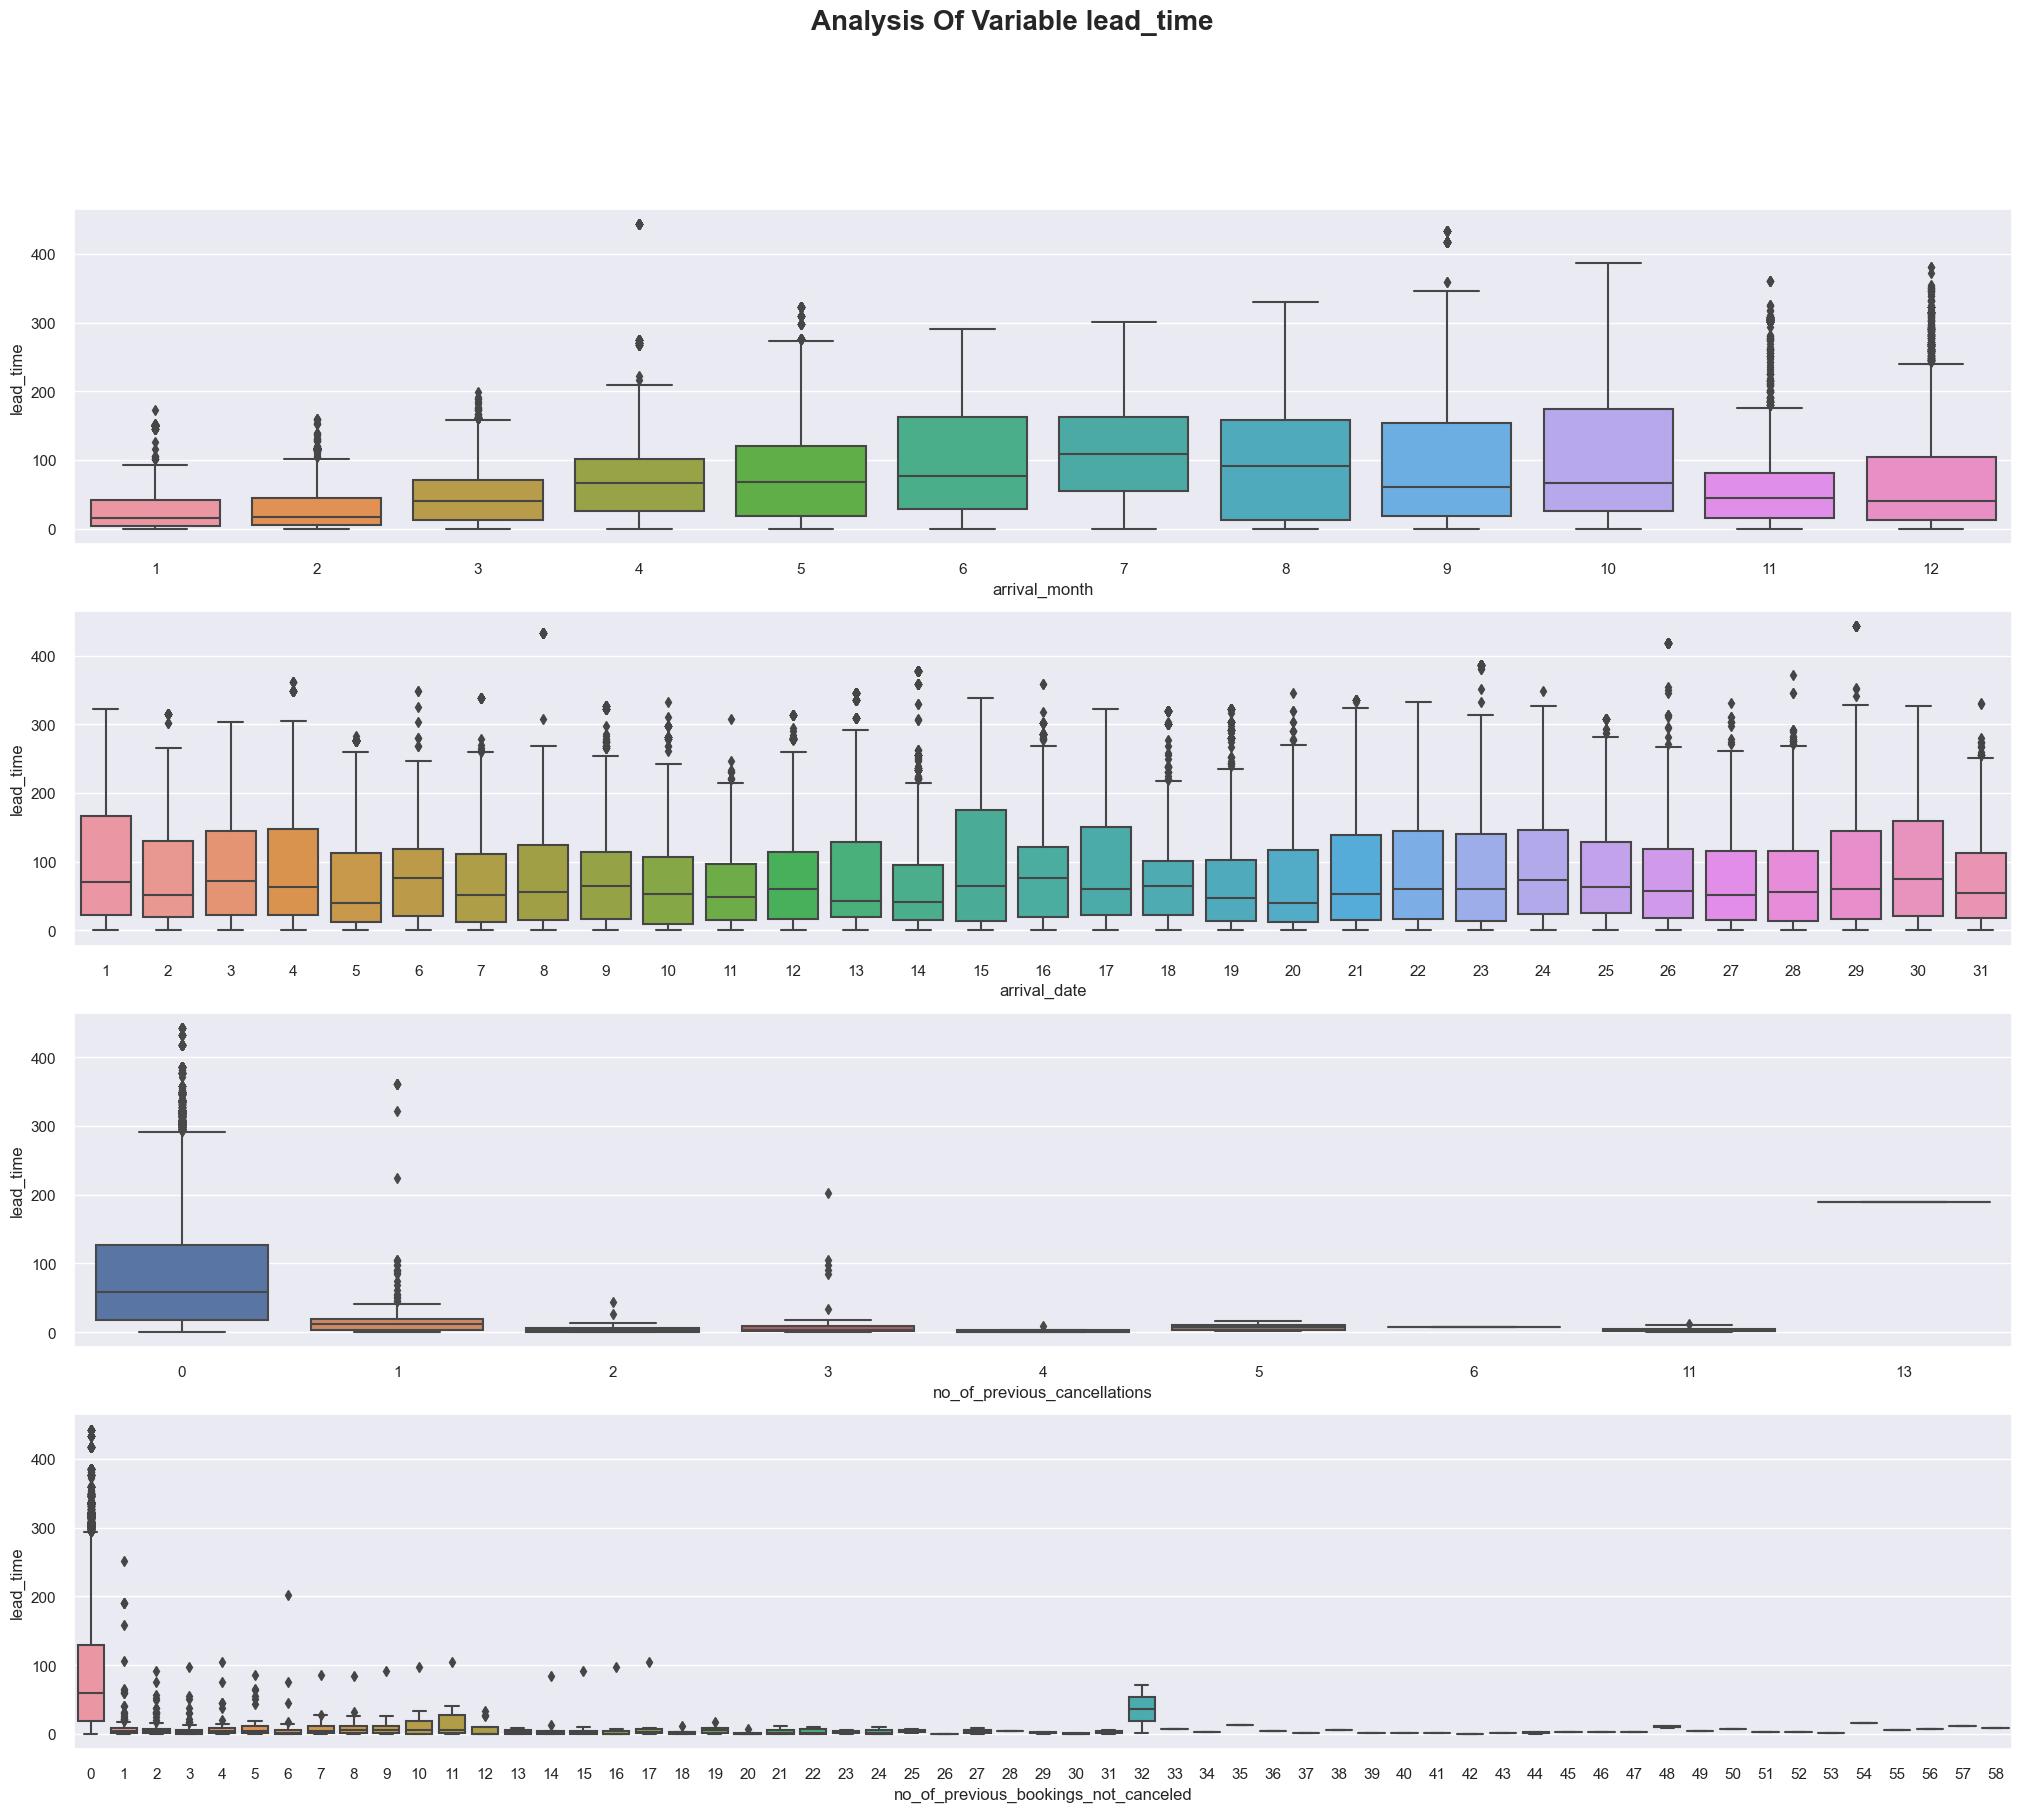

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

Looking here we can see that we have a tendency for higher price x higher lead time for cancellations.

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

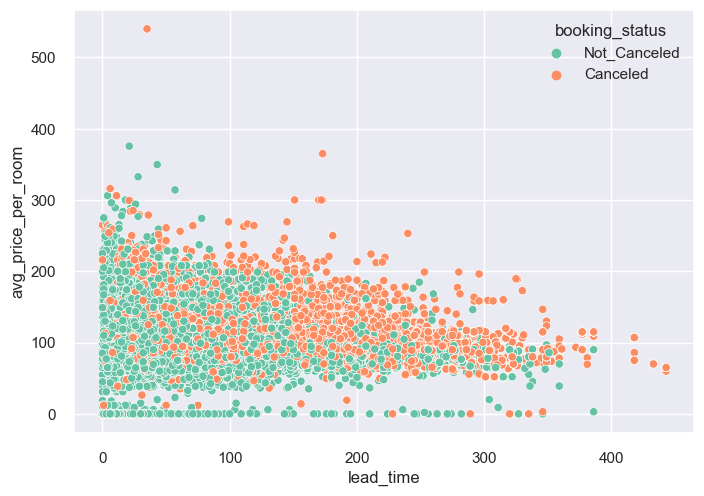

In [ ]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

# **3. Model Building**

Remove Booking_ID

In [ ]:
df = df.drop('Booking_ID', axis = 1)


In [ ]:
df.head(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled


 Label Encoder

 Use the LabelEncoder to transform our categorical variables into numeric variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

df['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder_market_segment_type.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder_booking_status.fit_transform(df['booking_status'])

In [ ]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))
print(le_name_mapping)

{'Canceled': 0, 'Not_Canceled': 1}


Separating into features variables and target variables

In [ ]:
X = df.drop('booking_status', axis = 1)
X = X.values
y = df['booking_status']

Balancing class

As we have many values of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

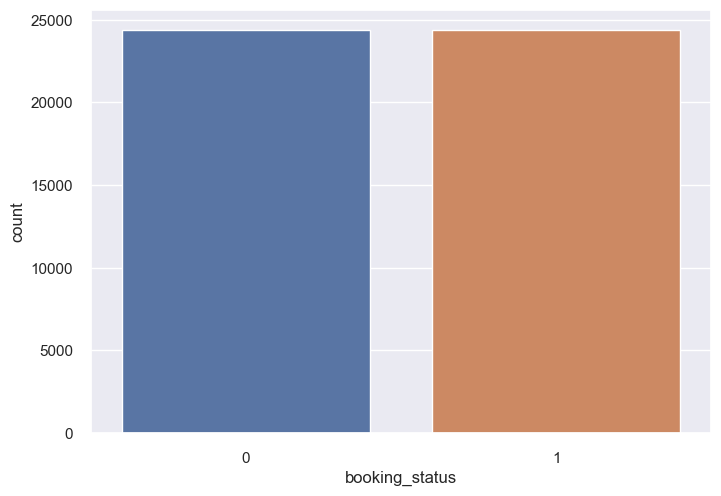

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

Standard Scale

We will use StandardScaler to put our data in the same scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 1, K Neighbors



Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model

Here we will use the GridSearch to figure out the best metrics to use in this model.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8205939202249165)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

0.8733770671040044

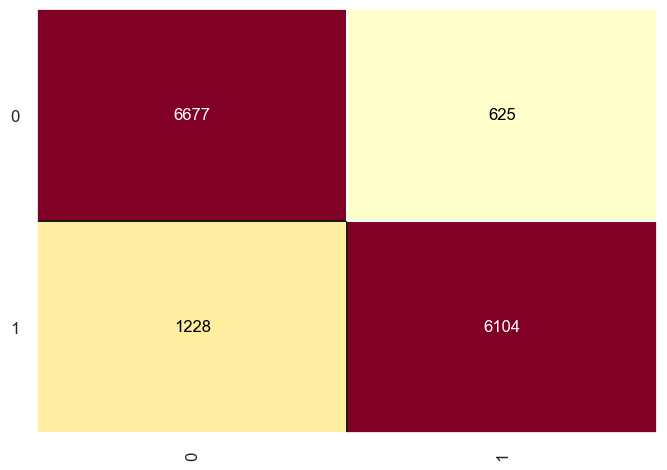

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7302
           1       0.91      0.83      0.87      7332

    accuracy                           0.87     14634
   macro avg       0.88      0.87      0.87     14634
weighted avg       0.88      0.87      0.87     14634



=> Result: 87.33% accuracy, it's a very good model

In [ ]:
#save the result
score_k_neighbors = 0.8733770671040044

## 2, Naive Bayes - Gaussian Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

0.5662839961732951

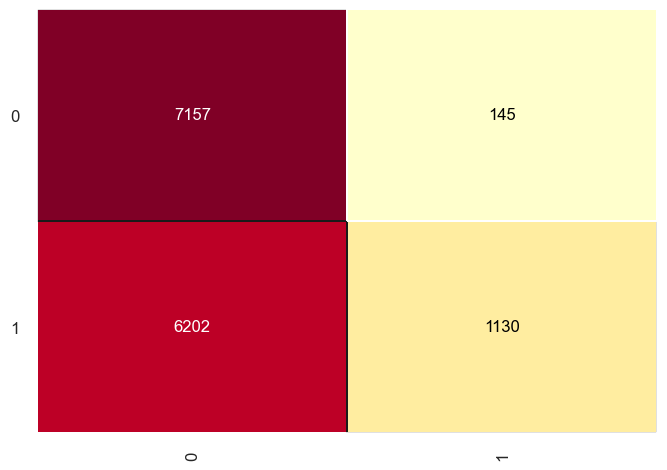

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.54      0.98      0.69      7302
           1       0.89      0.15      0.26      7332

    accuracy                           0.57     14634
   macro avg       0.71      0.57      0.48     14634
weighted avg       0.71      0.57      0.48     14634



=>We had 56,62% accuracy, It's definitely not a good model, it learned a lot to predict the reservations that will be canceled but practically didn't learn the ones that won't.

In [ ]:
#save the result
score_naive_gaussian = 0.5662839961732951

## 3, Decision Tree

We will use the Decision Tree Model, test Entropy and Gini calculations

Applying GridSearch to check which are the best metrics to use

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

->Decision Tree - GridSearch

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.8666315109942591


Running Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 3, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

0.8668170015033484

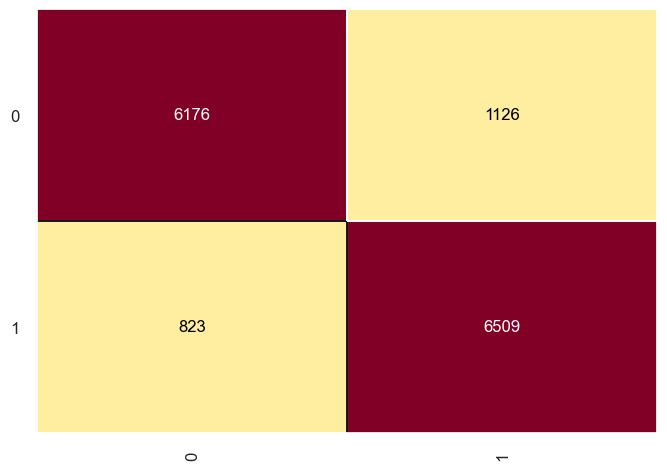

In [ ]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7302
           1       0.85      0.89      0.87      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



=> We had 86,65% accuracy, Here we had a very significant improvement when compared to Naive Bayes, the model was able to predict both results

In [ ]:
#save the result
score_tree = 0.8665436654366544

Checking for important variables of the model

In [ ]:
columns = df.drop('booking_status', axis = 1).columns
feature_decisionTree = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_decisionTree

lead_time                               0.406768
market_segment_type                     0.151100
no_of_special_requests                  0.132126
avg_price_per_room                      0.103065
arrival_month                           0.061552
arrival_date                            0.031777
no_of_weekend_nights                    0.026296
no_of_week_nights                       0.025927
no_of_adults                            0.022914
arrival_year                            0.015805
required_car_parking_space              0.009618
type_of_meal_plan                       0.008417
room_type_reserved                      0.003281
no_of_children                          0.001151
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

## 4, Random Forest

Applying GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

->Random Forest - GridSearch

In [ ]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)


Algorithm:  gini
Score:  0.8714050126849001
Mín Split:  2
Max Nvl:  11


->Running Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

->Result

0.8713270466037993

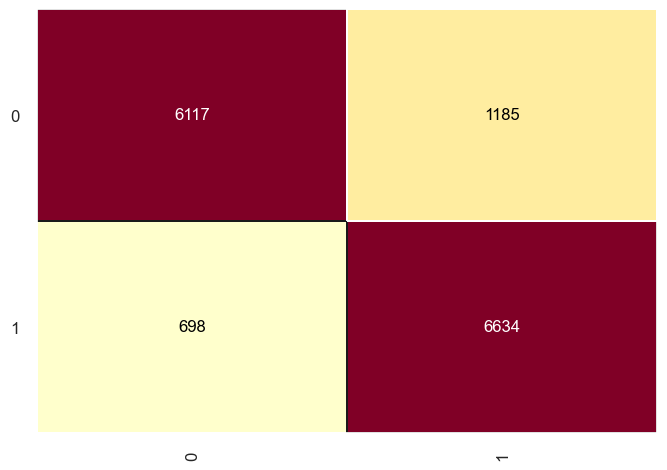

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7302
           1       0.85      0.90      0.88      7332

    accuracy                           0.87     14634
   macro avg       0.87      0.87      0.87     14634
weighted avg       0.87      0.87      0.87     14634



=> We had 87,13% the model was able to predict both results, its a very good model.

In [ ]:
#save result
score_random_forest = 0.8713953806204728

Checking for important variables of the model

In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.371337
no_of_special_requests                  0.161163
avg_price_per_room                      0.107185
market_segment_type                     0.092859
arrival_month                           0.071695
arrival_year                            0.048845
arrival_date                            0.032405
no_of_week_nights                       0.025410
no_of_weekend_nights                    0.023685
no_of_adults                            0.018125
type_of_meal_plan                       0.014925
required_car_parking_space              0.010435
room_type_reserved                      0.008982
repeated_guest                          0.004751
no_of_previous_bookings_not_canceled    0.004111
no_of_children                          0.003424
no_of_previous_cancellations            0.000662
dtype: float64

## 5, Extra Trees

Applying GridSearch

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

->ExtraTrees - GridSearch

In [ ]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.9227728100403777


In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

->Result

0.9341260079267459

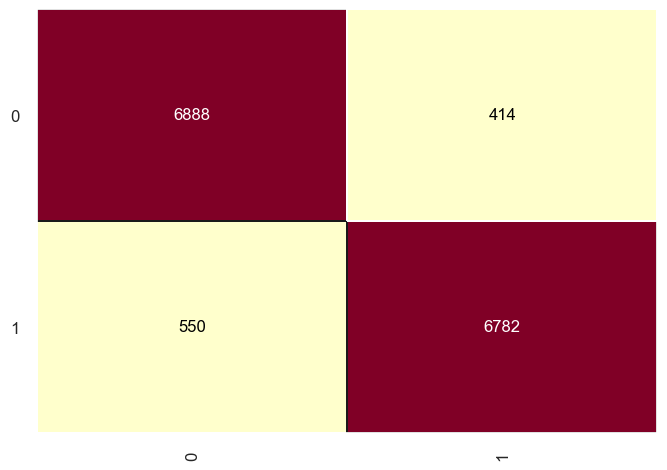

In [ ]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7302
           1       0.94      0.92      0.93      7332

    accuracy                           0.93     14634
   macro avg       0.93      0.93      0.93     14634
weighted avg       0.93      0.93      0.93     14634



=>Probably the best model we're going to have, 93.42% accuracy, the model was able to predict both results very well.

In [ ]:
#save result
score_extra = 0.9341260079267459

Checking for important variables of the model

In [ ]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

lead_time                               0.276327
avg_price_per_room                      0.117736
no_of_special_requests                  0.112428
arrival_month                           0.093471
arrival_date                            0.091680
no_of_week_nights                       0.062540
market_segment_type                     0.055625
no_of_weekend_nights                    0.046157
arrival_year                            0.038622
no_of_adults                            0.032076
type_of_meal_plan                       0.023076
room_type_reserved                      0.020770
no_of_children                          0.009966
repeated_guest                          0.009486
required_car_parking_space              0.008694
no_of_previous_bookings_not_canceled    0.000745
no_of_previous_cancellations            0.000600
dtype: float64

## 6, Gradient Boosting

Applying GridSearch

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.02 , 0.05 , 0.07 , 0.09 , 0.1  , 0.3  , 0.5  , 0.005]),
                         'n_estimators': array([300])})

In [ ]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.8820065018555138


->Gradient Boosting

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

->Result

0.8838321716550499

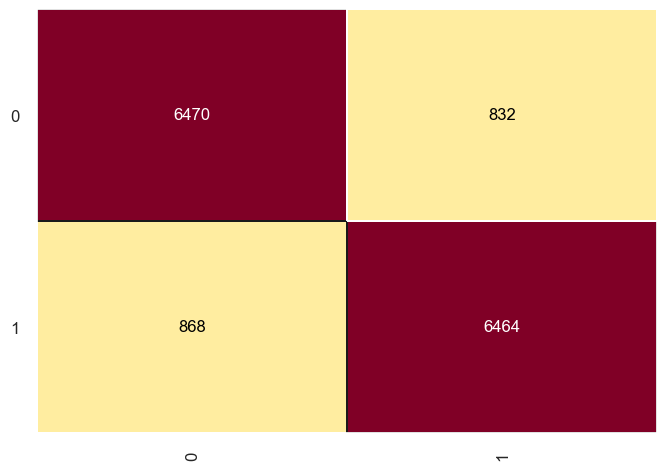

In [ ]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7302
           1       0.89      0.88      0.88      7332

    accuracy                           0.88     14634
   macro avg       0.88      0.88      0.88     14634
weighted avg       0.88      0.88      0.88     14634



->88.38%, it is really a very good model

In [ ]:
score_grad_standard = 0.8838321716550499

## 7, Neural Network

In [ ]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

model = Sequential()
model.add(Dense(200, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

model.fit(X_train, y_train, epochs = 100, batch_size = 400, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
86/86 [==============================] - 3s 12ms/step - loss: 0.5070 - acc: 0.7634 - val_loss: 0.4460 - val_acc: 0.7912
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4367 - acc: 0.7950 - val_loss: 0.4280 - val_acc: 0.8063
Epoch 3/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4231 - acc: 0.8067 - val_loss: 0.4169 - val_acc: 0.8104
Epoch 4/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4142 - acc: 0.8093 - val_loss: 0.4076 - val_acc: 0.8147
Epoch 5/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4039 - acc: 0.8140 - val_loss: 0.4021 - val_acc: 0.8162
Epoch 6/100
86/86 [==============================] - 1s 10ms/step - loss: 0.3973 - acc: 0.8187 - val_loss: 0.3932 - val_acc: 0.8193
Epoch 7/100
86/86 [==============================] - 1s 10ms/step - loss: 0.3901 - acc: 0.8213 - val_loss: 0.3889 - val_acc: 0.8244
Epoch 8/100
86/86 [==============================] - 1s 9ms/step - loss: 0.3866 

In [ ]:
score_neural_network = 0.8754

# **4. Model evaluation**

Checking ke  variables to predict the outcome with chi-square test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])

In [ ]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lead_time,797722.63
avg_price_per_room,12869.91
no_of_previous_bookings_not_canceled,5390.79
no_of_special_requests,4088.34
repeated_guest,819.60
required_car_parking_space,485.70
no_of_week_nights,441.53
no_of_previous_cancellations,418.67
no_of_weekend_nights,183.33
market_segment_type,132.63


=> The most important variable for machine learning models to arrive at the final result was actually the Lead_Time variable, followed by Avg_price_room and Number of special requests, something we were able to verify in our data analysis, which confirms our suspicions made earlier

Checking the result

In [ ]:
Naive_dict = {'Model':'Naive Bayes',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Type': 'Gini',
               'Precision':score_random_forest}

KNN_dict = {'Model':'KNN',
               'Type':'-',
               'Precision':score_k_neighbors}

Extra_dict = {'Model':'Extra Trees',
               'Type': 'Gini',
               'Precision':score_extra}

grad_dict = {'Model':'GradientBoost',
               'Type':'-',
               'Precision':score_grad_standard}

neural_dict = {'Model':'Neural Network',
               'Type':'-',
               'Precision':score_neural_network}

In [ ]:
resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'KNN':pd.Series(KNN_dict),
                       'GradientBoosting':pd.Series(grad_dict),
                       'Neural Network':pd.Series(neural_dict)
                      })

In [ ]:
resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,GradientBoosting,Neural Network
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,GradientBoost,Neural Network
Type,Gaussian,Gini,Gini,Gini,-,-,-
Precision,0.566284,0.866544,0.871395,0.934126,0.873377,0.883832,0.8754


=> The best model was the Extra Trees with 93.42% accuracy, the model was able to predict both results